In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [154]:
%store -r df_QCX
%store -r df_pilas

In [155]:
df_QCX = df_QCX
df_pilas = df_pilas

Primero vamos a eliminar las columnas que no necesitamos en el df_pilas

In [156]:
df_pilas.columns

Index(['Index', ' Time', ' Period', ' Seconds since', ' Mound', ' Comment',
       ' "LSF"  [CurrentAnalysis.Dry basis]',
       ' "LSF"  [Rolling.Analysis1.Dry basis]',
       ' "SM"  [Rolling.Analysis1.Dry basis]',
       ' "IM"  [Rolling.Analysis1.Dry basis]',
       ' "Tph"  [Rolling.Analysis1.Dry basis]',
       ' "IM"  [CurrentProduct.Dry basis]',
       ' "LSF"  [CurrentProduct.Dry basis]',
       ' "SM"  [CurrentProduct.Dry basis]',
       ' "Tph"  [CurrentProduct.Dry basis]',
       ' "CaO"  [CurrentProduct.Dry basis]',
       ' "CaO"  [Rolling.Analysis1.Dry basis]',
       ' "MgO"  [CurrentProduct.Dry basis]',
       ' "MgO"  [Rolling.Analysis1.Dry basis]',
       ' "Al2O3"  [CurrentProduct.Dry basis]',
       ' "Fe2O3"  [CurrentProduct.Dry basis]',
       ' "Al2O3"  [Rolling.Analysis1.Dry basis]',
       ' "Fe2O3"  [Rolling.Analysis1.Dry basis]',
       ' "SiO2"  [CurrentProduct.Dry basis]',
       ' "SiO2"  [Rolling.Analysis1.Dry basis]',
       ' "SM"  [CurrentAnalysis.Dry

In [157]:
# Lista de columnas a eliminar
columns_to_drop = [
    'Index', ' Time', ' Period', ' Seconds since', ' Mound', ' Comment', ' "Tph"  [CurrentProduct.Dry basis]',
    ' "Tph"  [CurrentAnalysis.Dry basis]', ' "Tons"  [CurrentProduct.Dry basis]', ' "MgO"  [CurrentAnalysis.Dry basis]'
]

# Eliminar las columnas del DataFrame
df_pilas = df_pilas.drop(columns=columns_to_drop)

# Verificar que las columnas han sido eliminadas
df_pilas.head()

,"""LSF"" [CurrentAnalysis.Dry basis]","""LSF"" [Rolling.Analysis1.Dry basis]","""SM"" [Rolling.Analysis1.Dry basis]","""IM"" [Rolling.Analysis1.Dry basis]","""Tph"" [Rolling.Analysis1.Dry basis]","""IM"" [CurrentProduct.Dry basis]","""LSF"" [CurrentProduct.Dry basis]","""SM"" [CurrentProduct.Dry basis]","""CaO"" [CurrentProduct.Dry basis]","""CaO"" [Rolling.Analysis1.Dry basis]",...,"""Fe2O3"" [Rolling.Analysis1.Dry basis]","""SiO2"" [CurrentProduct.Dry basis]","""SiO2"" [Rolling.Analysis1.Dry basis]","""SM"" [CurrentAnalysis.Dry basis]","""CaO"" [CurrentAnalysis.Dry basis]","""IM"" [CurrentAnalysis.Dry basis]","""Fe2O3"" [CurrentAnalysis.Dry basis]","""Al2O3"" [CurrentAnalysis.Dry basis]","""SiO2"" [CurrentAnalysis.Dry basis]",idPila
0,85.36614,89.48588,2.90785,2.37234,1114.46983,1.98546,90.27996,2.91912,41.84905,41.98436,...,1.51802,14.74662,14.88611,4.26911,41.25781,1.65372,1.40812,2.32864,15.95262,123
1,87.28462,89.37545,2.96634,2.33612,1114.02926,1.98764,90.22144,2.92716,41.86518,42.04497,...,1.51188,14.76609,14.96167,3.38848,42.71772,2.11807,1.49516,3.16685,15.79714,123
2,88.86168,89.51137,3.01566,2.30483,1117.04840,1.98627,90.19513,2.94083,41.86088,42.06704,...,1.50267,14.77650,14.97599,3.82237,41.63558,1.90047,1.38070,2.62398,15.30737,123
3,81.11225,89.28863,3.08354,2.27769,1123.52306,1.98468,90.01179,2.95603,41.81647,41.94275,...,1.48479,14.79930,15.00664,3.90974,39.55174,1.88807,1.41361,2.66900,15.96195,123
4,73.10878,88.31500,3.09132,2.29887,1120.21457,1.99242,89.70196,2.95566,41.77038,41.78364,...,1.48236,14.83311,15.11692,2.93623,38.92155,2.47363,1.65710,4.09905,16.90138,123


Luego filtramos las fechas y los id_eq que vamos a ocupar en el df_QCX

In [158]:
df_QCX = df_QCX[(df_QCX['fecha'] >= '2023-01-01')]
df_QCX = df_QCX[df_QCX['id_eq'].isin(['Man_CLK461', 'Man_CLK462', 'Aus_CLK463'])]
df_QCX.head()

,fecha,fecha-hora,id_eq,Muestra #,FCAO,SiO2,Al2O3,Fe2O3,CaO,MgO,SO3,K2O,Na2O,C3S,C2S,C3A,C4AF,A/S,idPila
155074,2023-01-01,2023-01-01 00:31:47,Man_CLK461,1903356,1.555899,21.20,5.30,2.46,67.96,2.71,1.01,0.53,0.40,70.087895,3.127673,9.88268,7.48578,0.957617,10222.0
155075,2023-01-01,2023-01-01 00:36:05,Man_CLK462,1903357,1.937381,20.78,5.19,2.40,66.71,2.73,1.63,0.64,0.48,67.462912,2.732228,9.69270,7.30320,0.714132,10222.0
155076,2023-01-01,2023-01-01 00:40:34,Aus_CLK463,1903358,1.840306,20.80,5.17,2.41,66.41,2.61,1.59,0.63,0.46,66.604864,3.735012,9.62278,7.33363,0.710515,10222.0
155082,2023-01-01,2023-01-01 02:34:57,Man_CLK461,1903364,1.276766,21.18,5.01,2.35,66.10,2.64,1.87,0.83,0.54,65.909706,7.079622,9.30030,7.15105,0.750351,10222.0
155083,2023-01-01,2023-01-01 02:38:43,Man_CLK462,1903365,1.965947,20.85,5.23,2.38,67.17,2.73,1.47,0.60,0.47,68.447160,2.102670,9.83254,7.24234,0.759925,10222.0


# 0. Limpieza de valores nulos

In [159]:
df_pilas.isnull().mean()*100

 "LSF"  [CurrentAnalysis.Dry basis]        0.028895
 "LSF"  [Rolling.Analysis1.Dry basis]      0.028895
 "SM"  [Rolling.Analysis1.Dry basis]       0.028895
 "IM"  [Rolling.Analysis1.Dry basis]       0.028895
 "Tph"  [Rolling.Analysis1.Dry basis]      0.028895
 "IM"  [CurrentProduct.Dry basis]          0.026302
 "LSF"  [CurrentProduct.Dry basis]         0.026302
 "SM"  [CurrentProduct.Dry basis]          0.026302
 "CaO"  [CurrentProduct.Dry basis]         0.026302
 "CaO"  [Rolling.Analysis1.Dry basis]      0.028895
 "MgO"  [CurrentProduct.Dry basis]         0.026302
 "MgO"  [Rolling.Analysis1.Dry basis]      0.028895
 "Al2O3"  [CurrentProduct.Dry basis]       0.026302
 "Fe2O3"  [CurrentProduct.Dry basis]       0.026302
 "Al2O3"  [Rolling.Analysis1.Dry basis]    0.028895
 "Fe2O3"  [Rolling.Analysis1.Dry basis]    0.028895
 "SiO2"  [CurrentProduct.Dry basis]        0.026302
 "SiO2"  [Rolling.Analysis1.Dry basis]     0.028895
 "SM"  [CurrentAnalysis.Dry basis]         0.028895
 "CaO"  [Cur

In [160]:
df_pilas.shape

(269945, 25)

In [161]:
df_pilas = df_pilas.dropna()
df_pilas.shape

(268397, 25)

In [162]:
df_QCX.isnull().mean()*100

fecha          0.000000
fecha-hora     0.000000
id_eq          0.000000
Muestra #      0.000000
FCAO           0.189036
SiO2          12.765711
Al2O3         12.765711
Fe2O3         12.765711
CaO           12.765711
MgO           12.765711
SO3           12.765711
K2O           12.765711
Na2O          12.765711
C3S           12.769569
C2S           17.202268
C3A           12.765711
C4AF          12.765711
A/S           12.769569
idPila         1.219089
dtype: float64

In [163]:
df_QCX.shape

(25921, 19)

In [164]:
df_QCX = df_QCX.dropna()
df_QCX.shape

(21201, 19)

# 1. Creación de dataframe combinado entre df_pilas y df_QCX

In [165]:
resumen_pilas = df_pilas.groupby('idPila').agg({
    ' "CaO"  [CurrentProduct.Dry basis]': 'last',
    ' "SiO2"  [CurrentProduct.Dry basis]': 'last',
    ' "Al2O3"  [CurrentProduct.Dry basis]': 'last',
    ' "Fe2O3"  [CurrentProduct.Dry basis]': 'last',
    ' "MgO"  [CurrentProduct.Dry basis]': 'last',
    ' "CaO"  [Rolling.Analysis1.Dry basis]': 'std',
    ' "SiO2"  [Rolling.Analysis1.Dry basis]': 'std',
    ' "Al2O3"  [Rolling.Analysis1.Dry basis]': 'std',
    ' "Fe2O3"  [Rolling.Analysis1.Dry basis]': 'std',
    ' "MgO"  [Rolling.Analysis1.Dry basis]': 'std'
}).reset_index()

resumen_pilas

,idPila,"""CaO"" [CurrentProduct.Dry basis]","""SiO2"" [CurrentProduct.Dry basis]","""Al2O3"" [CurrentProduct.Dry basis]","""Fe2O3"" [CurrentProduct.Dry basis]","""MgO"" [CurrentProduct.Dry basis]","""CaO"" [Rolling.Analysis1.Dry basis]","""SiO2"" [Rolling.Analysis1.Dry basis]","""Al2O3"" [Rolling.Analysis1.Dry basis]","""Fe2O3"" [Rolling.Analysis1.Dry basis]","""MgO"" [Rolling.Analysis1.Dry basis]"
0,123,41.49635,13.98593,3.31018,1.47601,3.05997,1.491041,1.377877,0.421391,0.339493,0.929389
1,124,41.36340,14.42940,3.52051,1.56484,2.78783,0.930739,0.928932,0.244604,0.146905,0.369157
2,223,41.48563,14.02433,3.22272,1.44741,3.11849,1.389864,1.253005,0.274830,0.175671,0.947844
3,224,41.38632,14.44026,3.55933,1.57103,2.78476,0.775323,0.826135,0.224666,0.131906,0.351625
4,324,41.37214,14.43988,3.53031,1.57196,2.78421,0.692454,0.702233,0.211624,0.117674,0.348333
...,...,...,...,...,...,...,...,...,...,...,...
180,9323,41.34882,14.43026,3.52458,1.56906,2.82011,0.775892,0.768206,0.208983,0.109681,0.413095
181,9423,41.36747,14.41839,3.53572,1.56485,2.80782,0.694112,0.648080,0.239633,0.124532,0.388471
182,9523,41.37987,14.47344,3.49803,1.58023,2.79777,0.961692,1.051196,0.278964,0.148819,0.485684
183,9623,41.35239,14.42118,3.54883,1.56190,2.79854,0.884096,0.896789,0.252115,0.123681,0.423213


In [166]:
# Hacer una combinación tipo inner join en la columna 'idPila'
dataset = pd.merge(df_QCX, resumen_pilas, on='idPila', how='inner')

# Mostrar el DataFrame combinado
dataset.head()

,fecha,fecha-hora,id_eq,Muestra #,FCAO,SiO2,Al2O3,Fe2O3,CaO,MgO,...,"""CaO"" [CurrentProduct.Dry basis]","""SiO2"" [CurrentProduct.Dry basis]","""Al2O3"" [CurrentProduct.Dry basis]","""Fe2O3"" [CurrentProduct.Dry basis]","""MgO"" [CurrentProduct.Dry basis]","""CaO"" [Rolling.Analysis1.Dry basis]","""SiO2"" [Rolling.Analysis1.Dry basis]","""Al2O3"" [Rolling.Analysis1.Dry basis]","""Fe2O3"" [Rolling.Analysis1.Dry basis]","""MgO"" [Rolling.Analysis1.Dry basis]"
0,2023-01-04,2023-01-04 15:40:33,Aus_CLK463,1904522,1.803720,20.81,5.27,2.40,67.25,2.77,...,41.49635,13.98593,3.31018,1.47601,3.05997,1.491041,1.377877,0.421391,0.339493,0.929389
1,2023-01-04,2023-01-04 15:52:23,Man_CLK462,1904526,1.743684,20.72,5.46,2.48,65.48,2.83,...,41.49635,13.98593,3.31018,1.47601,3.05997,1.491041,1.377877,0.421391,0.339493,0.929389
2,2023-01-04,2023-01-04 16:32:21,Man_CLK461,1904533,1.867867,20.67,5.22,2.46,66.92,2.77,...,41.49635,13.98593,3.31018,1.47601,3.05997,1.491041,1.377877,0.421391,0.339493,0.929389
3,2023-01-04,2023-01-04 16:34:24,Man_CLK462,1904534,1.725303,20.86,5.44,2.47,66.41,2.82,...,41.49635,13.98593,3.31018,1.47601,3.05997,1.491041,1.377877,0.421391,0.339493,0.929389
4,2023-01-04,2023-01-04 16:40:36,Aus_CLK463,1904535,1.835271,20.77,5.38,2.45,67.50,2.82,...,41.49635,13.98593,3.31018,1.47601,3.05997,1.491041,1.377877,0.421391,0.339493,0.929389


In [167]:
dataset.columns

Index(['fecha', 'fecha-hora', 'id_eq', 'Muestra #', 'FCAO', 'SiO2', 'Al2O3',
       'Fe2O3', 'CaO', 'MgO', 'SO3', 'K2O', 'Na2O', 'C3S', 'C2S', 'C3A',
       'C4AF', 'A/S', 'idPila', ' "CaO"  [CurrentProduct.Dry basis]',
       ' "SiO2"  [CurrentProduct.Dry basis]',
       ' "Al2O3"  [CurrentProduct.Dry basis]',
       ' "Fe2O3"  [CurrentProduct.Dry basis]',
       ' "MgO"  [CurrentProduct.Dry basis]',
       ' "CaO"  [Rolling.Analysis1.Dry basis]',
       ' "SiO2"  [Rolling.Analysis1.Dry basis]',
       ' "Al2O3"  [Rolling.Analysis1.Dry basis]',
       ' "Fe2O3"  [Rolling.Analysis1.Dry basis]',
       ' "MgO"  [Rolling.Analysis1.Dry basis]'],
      dtype='object')

In [168]:
dataset.drop(['fecha', 'fecha-hora','Muestra #', 'idPila'], axis=1, inplace=True)
dataset.head()

,id_eq,FCAO,SiO2,Al2O3,Fe2O3,CaO,MgO,SO3,K2O,Na2O,...,"""CaO"" [CurrentProduct.Dry basis]","""SiO2"" [CurrentProduct.Dry basis]","""Al2O3"" [CurrentProduct.Dry basis]","""Fe2O3"" [CurrentProduct.Dry basis]","""MgO"" [CurrentProduct.Dry basis]","""CaO"" [Rolling.Analysis1.Dry basis]","""SiO2"" [Rolling.Analysis1.Dry basis]","""Al2O3"" [Rolling.Analysis1.Dry basis]","""Fe2O3"" [Rolling.Analysis1.Dry basis]","""MgO"" [Rolling.Analysis1.Dry basis]"
0,Aus_CLK463,1.803720,20.81,5.27,2.40,67.25,2.77,1.03,0.59,0.47,...,41.49635,13.98593,3.31018,1.47601,3.05997,1.491041,1.377877,0.421391,0.339493,0.929389
1,Man_CLK462,1.743684,20.72,5.46,2.48,65.48,2.83,1.67,0.66,0.49,...,41.49635,13.98593,3.31018,1.47601,3.05997,1.491041,1.377877,0.421391,0.339493,0.929389
2,Man_CLK461,1.867867,20.67,5.22,2.46,66.92,2.77,1.28,0.56,0.41,...,41.49635,13.98593,3.31018,1.47601,3.05997,1.491041,1.377877,0.421391,0.339493,0.929389
3,Man_CLK462,1.725303,20.86,5.44,2.47,66.41,2.82,1.46,0.59,0.47,...,41.49635,13.98593,3.31018,1.47601,3.05997,1.491041,1.377877,0.421391,0.339493,0.929389
4,Aus_CLK463,1.835271,20.77,5.38,2.45,67.50,2.82,0.98,0.57,0.47,...,41.49635,13.98593,3.31018,1.47601,3.05997,1.491041,1.377877,0.421391,0.339493,0.929389


# 2. Tratamiento de outliers

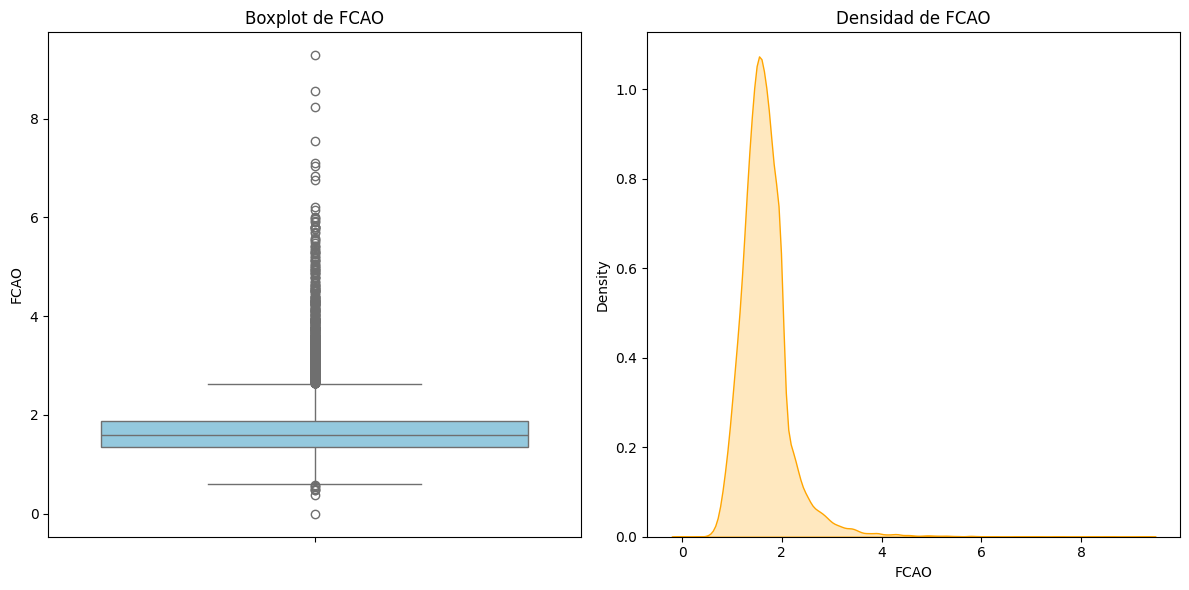

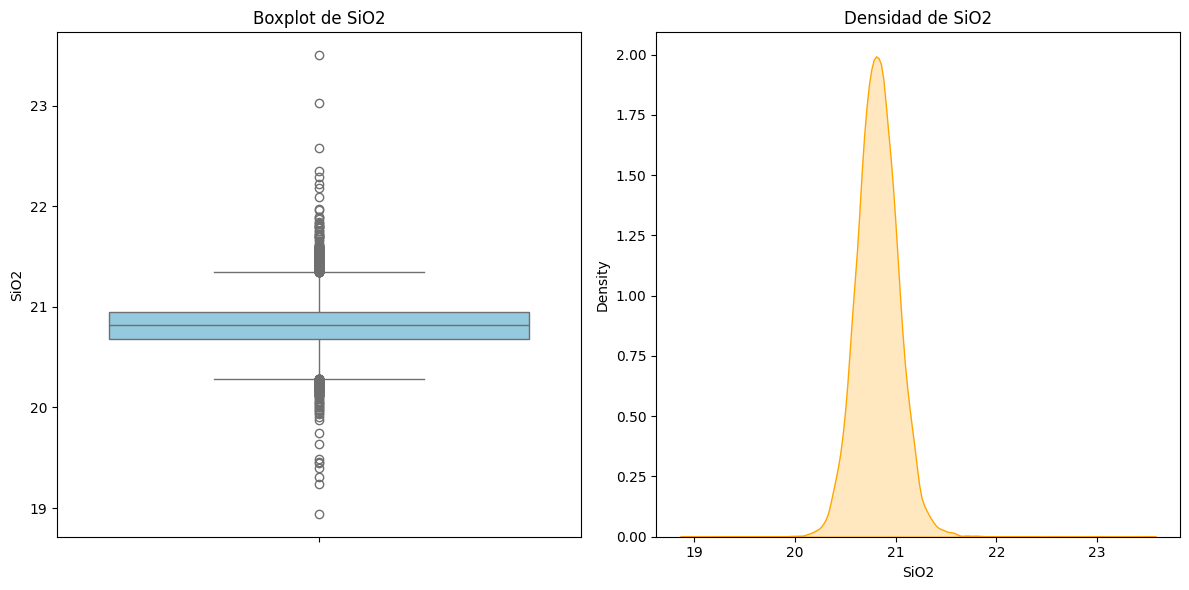

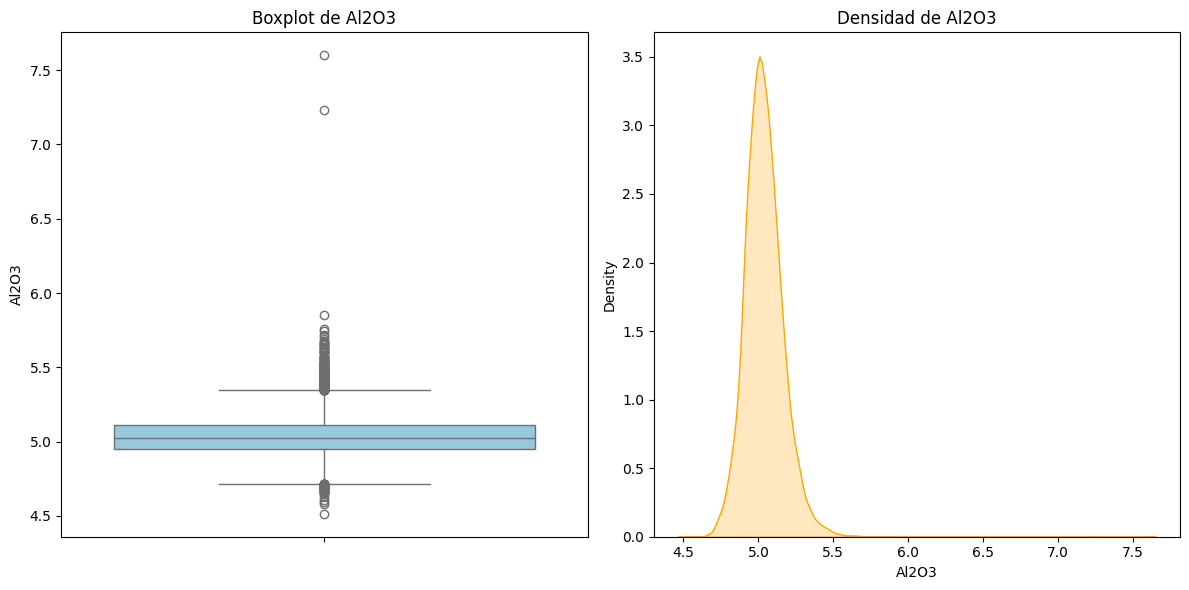

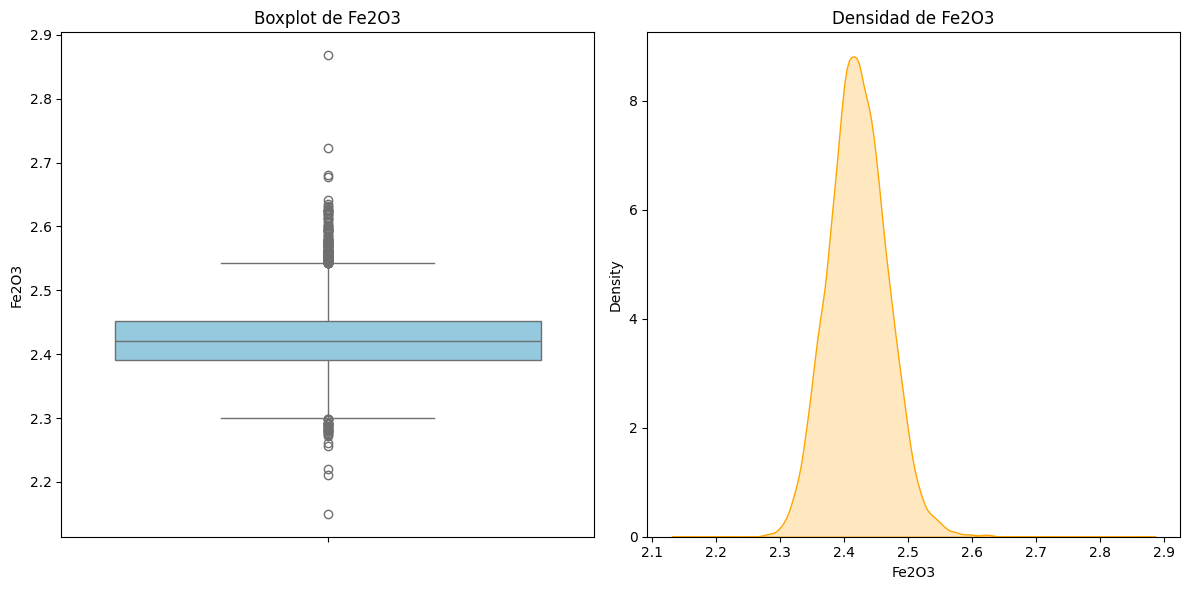

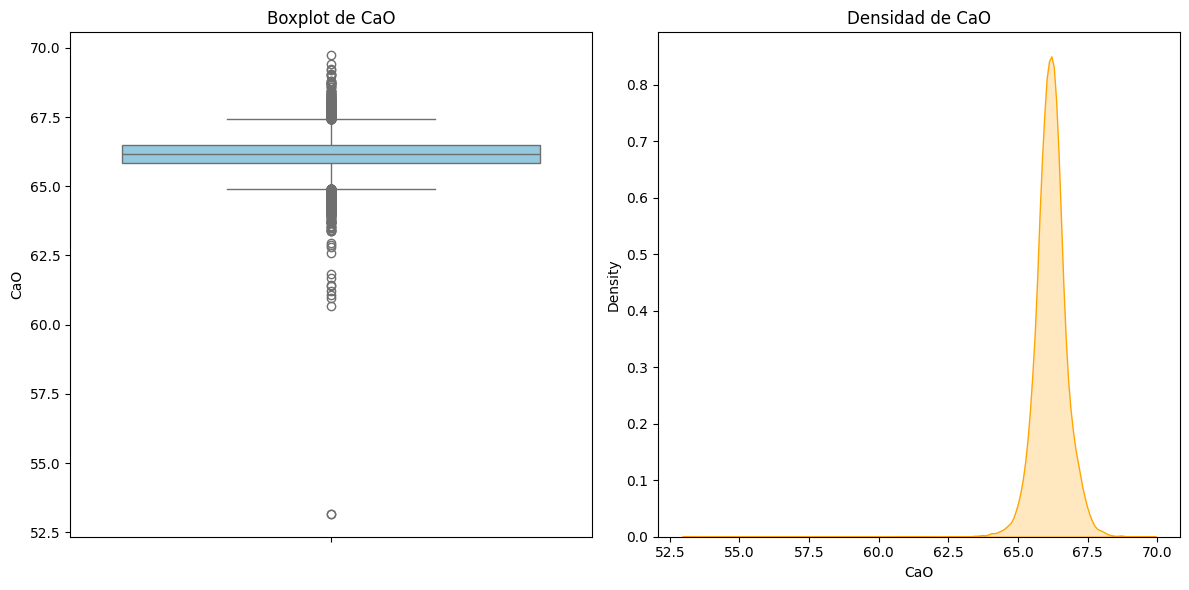

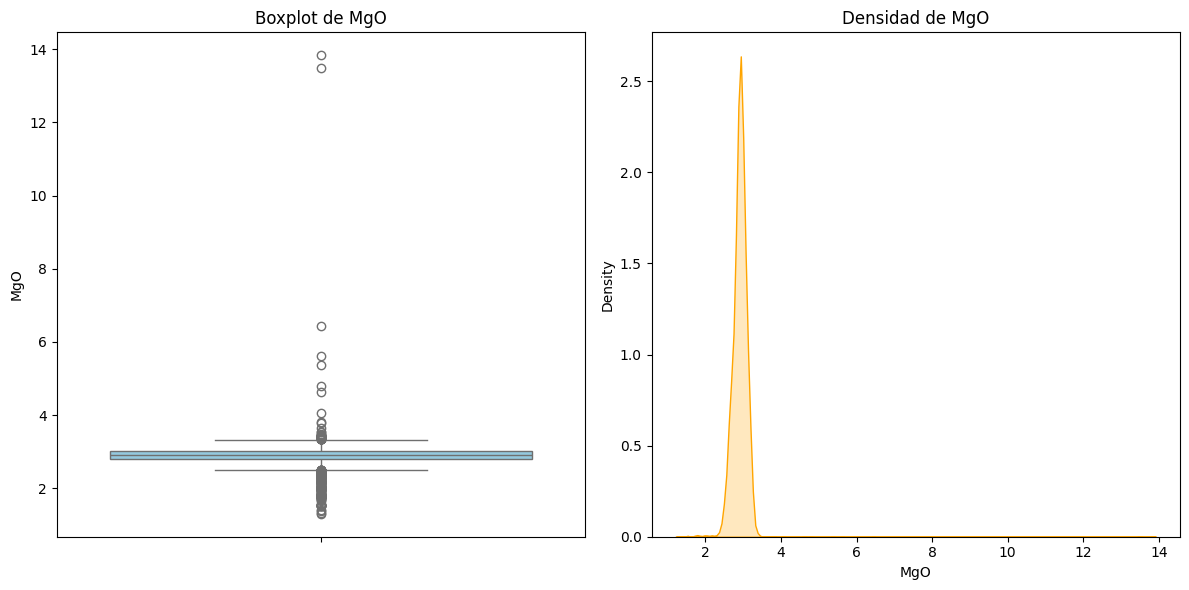

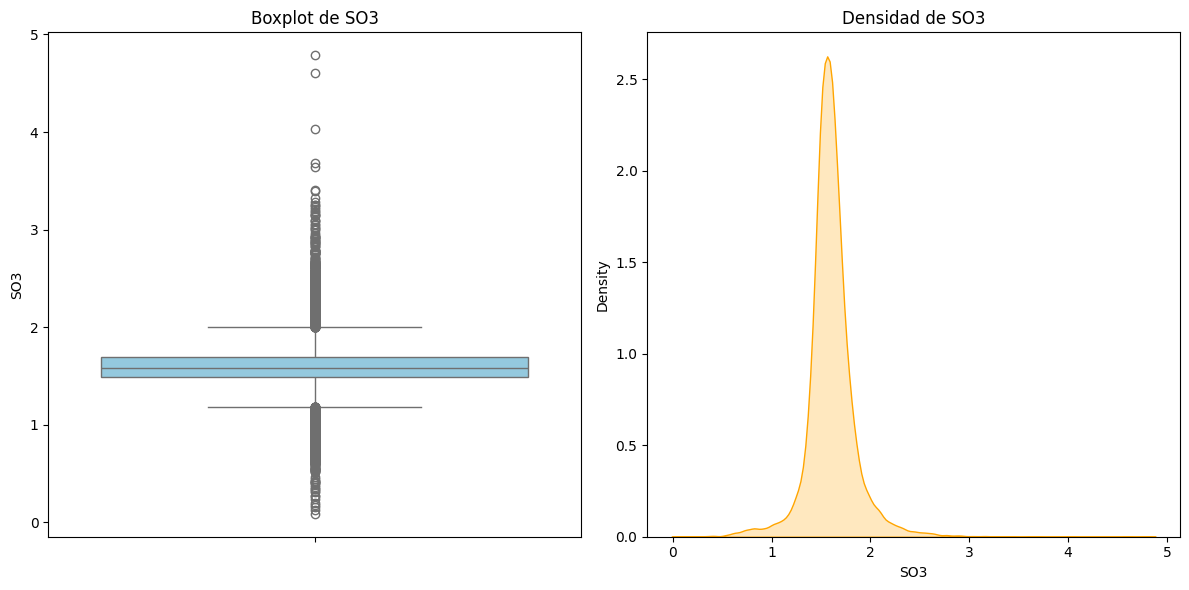

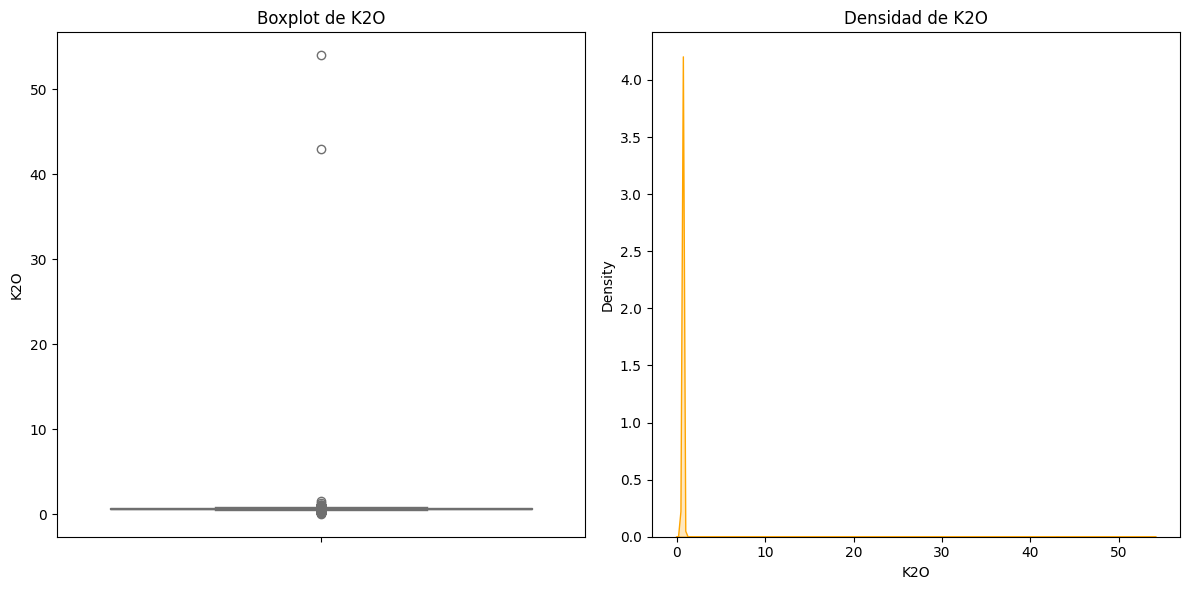

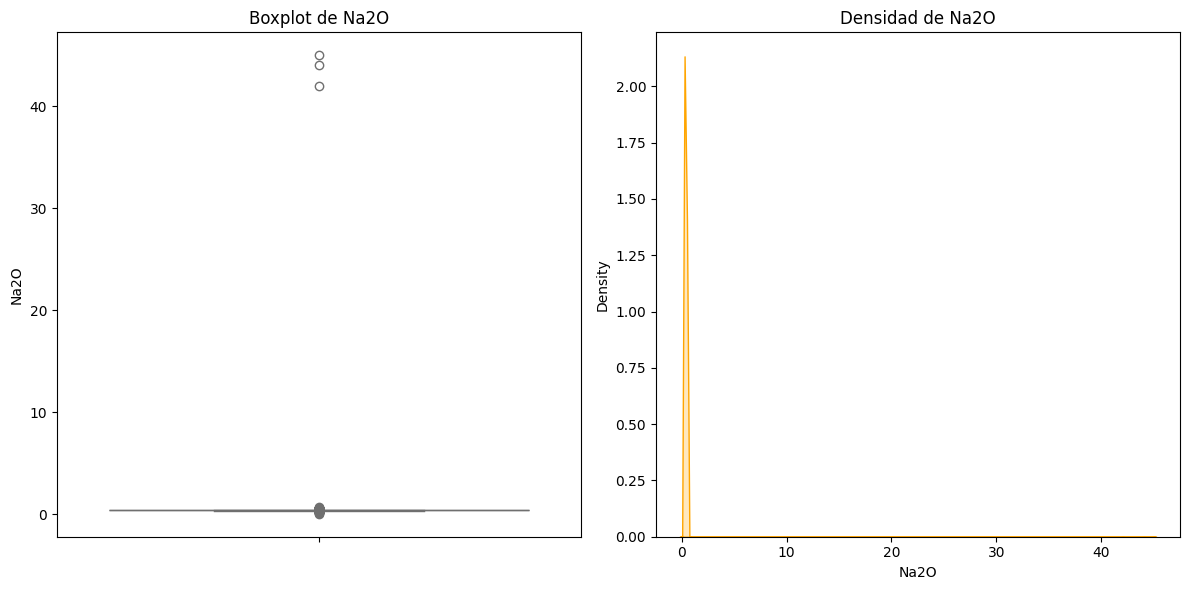

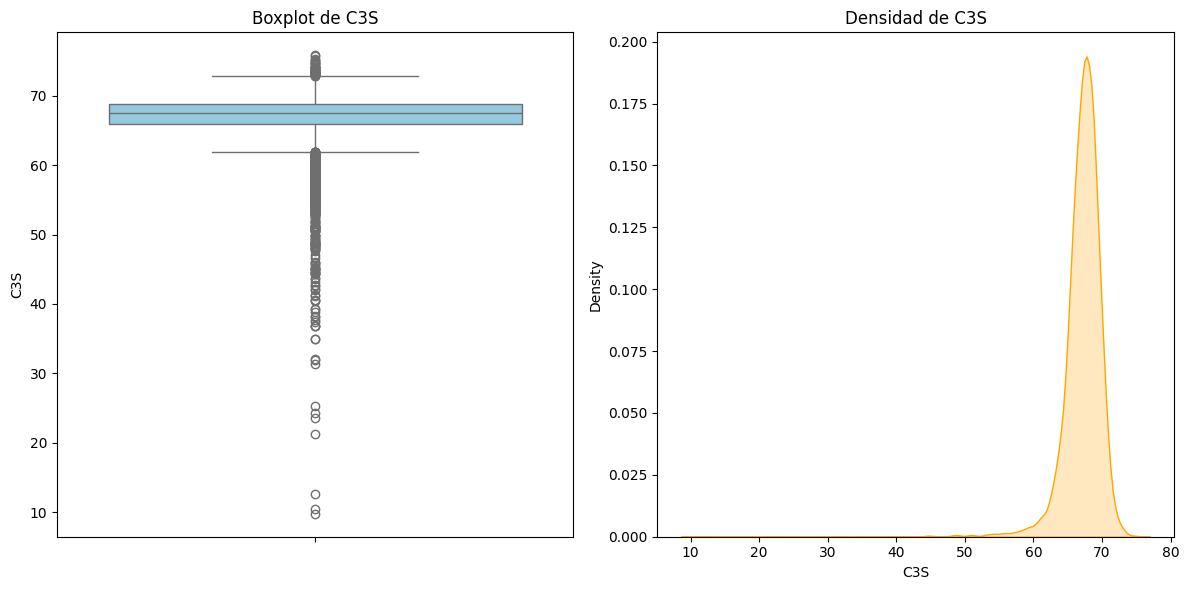

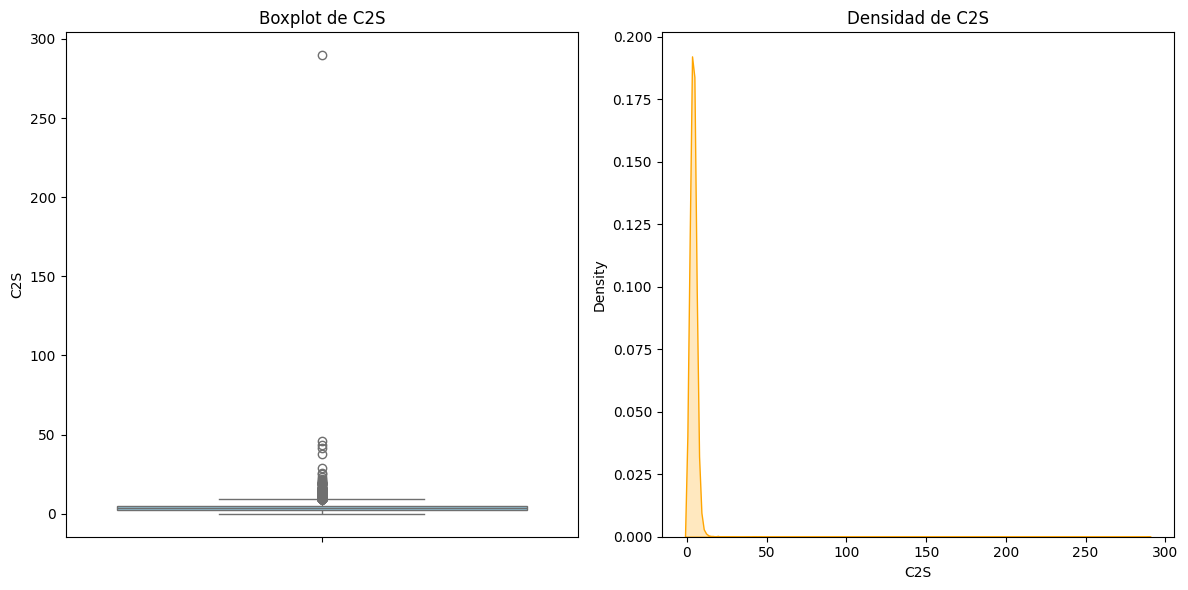

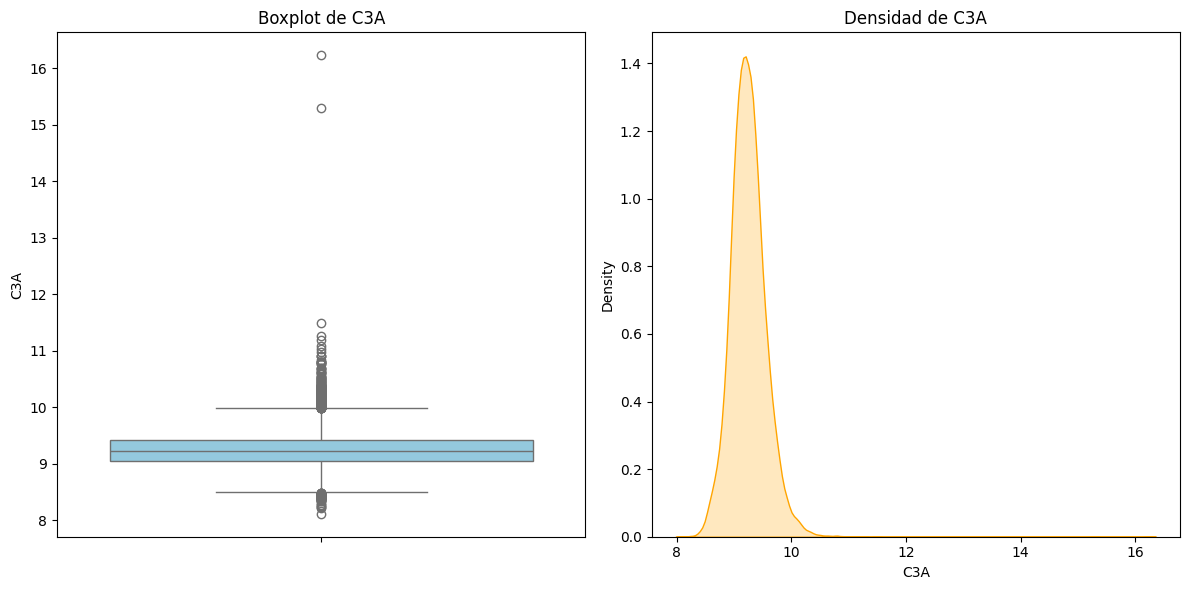

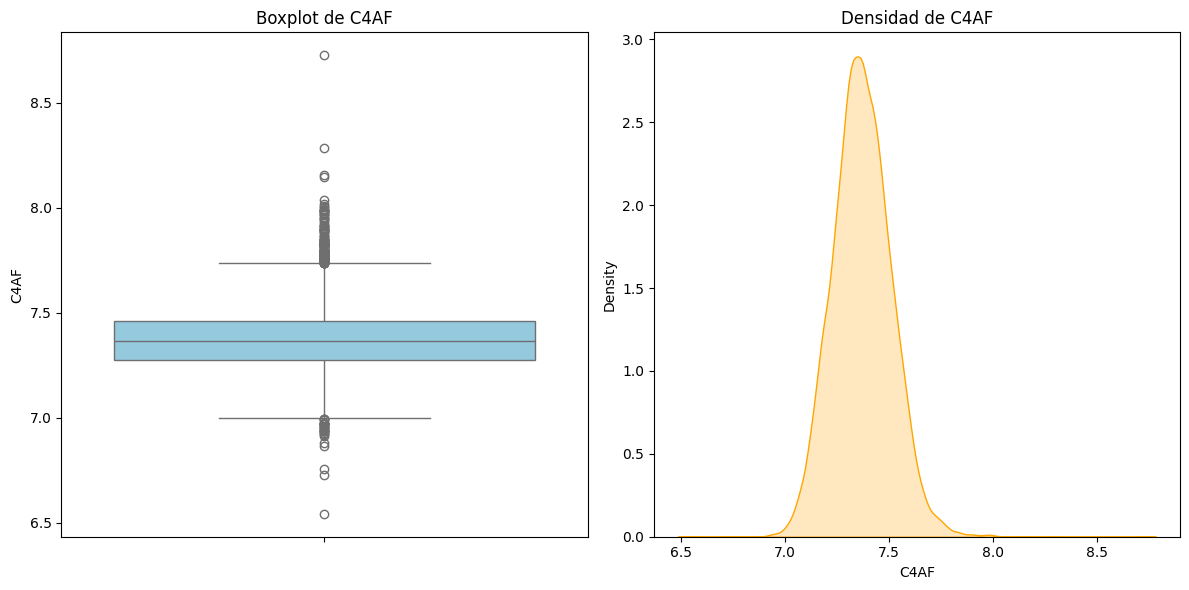

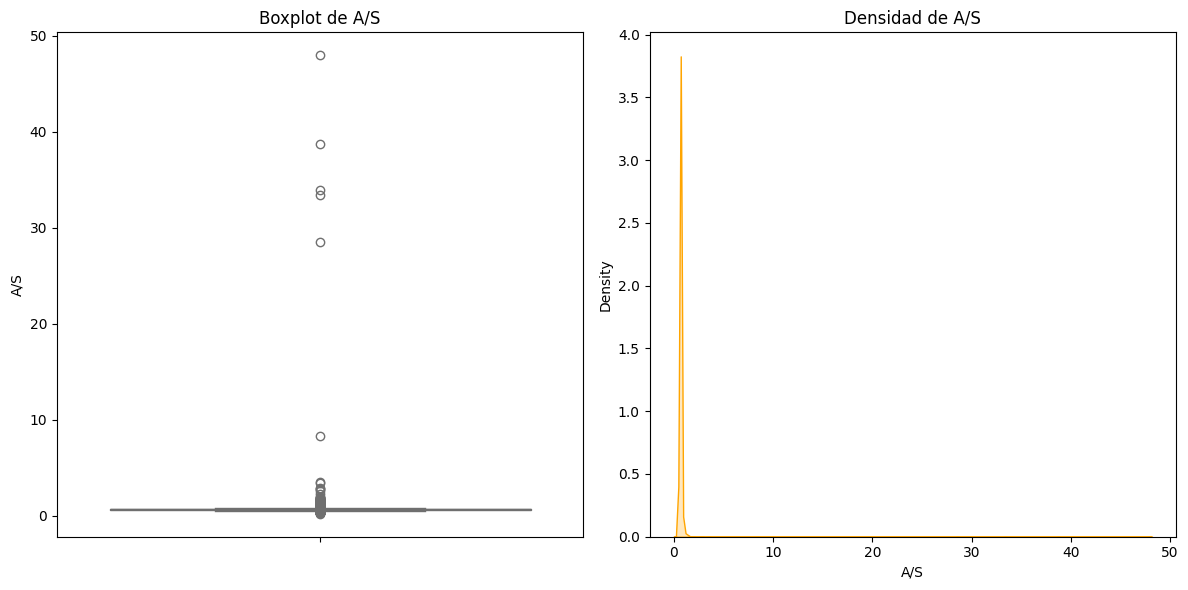

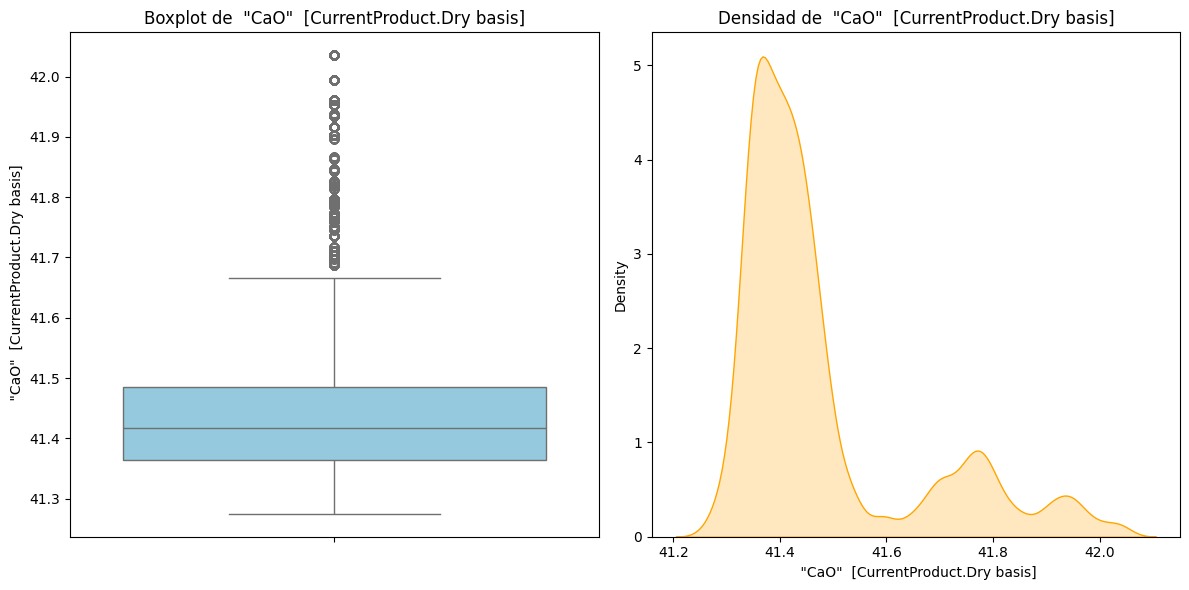

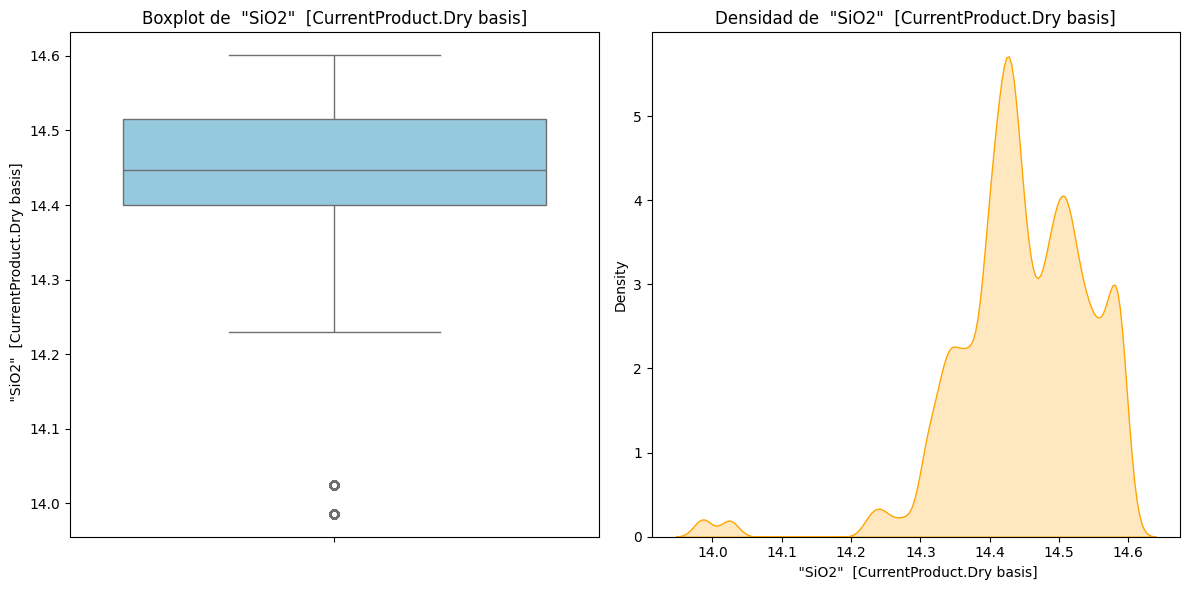

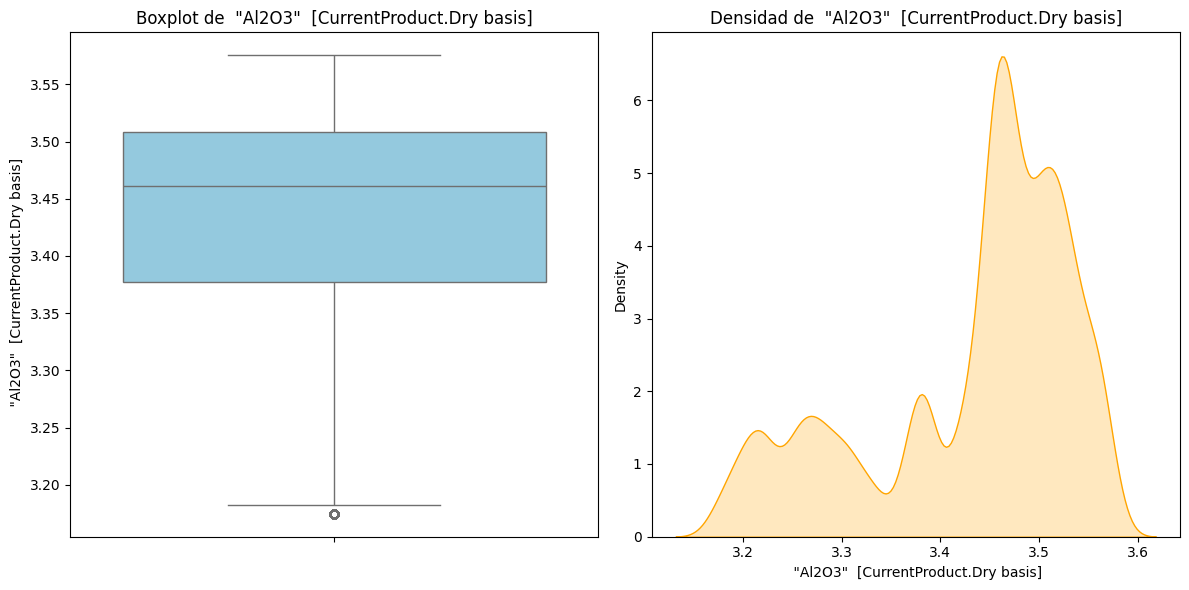

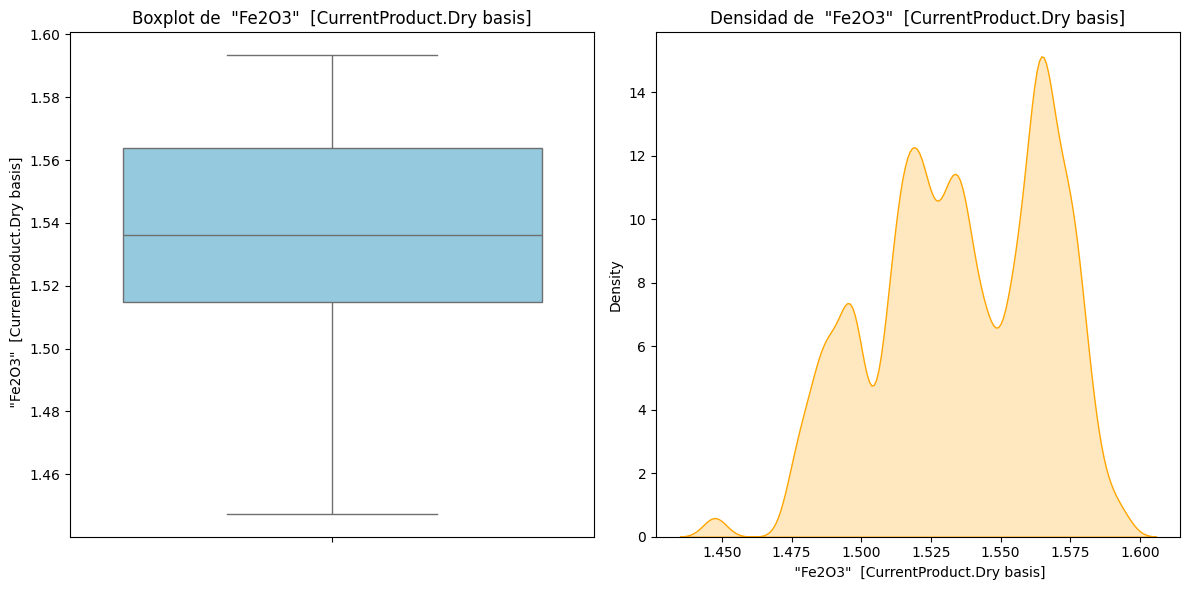

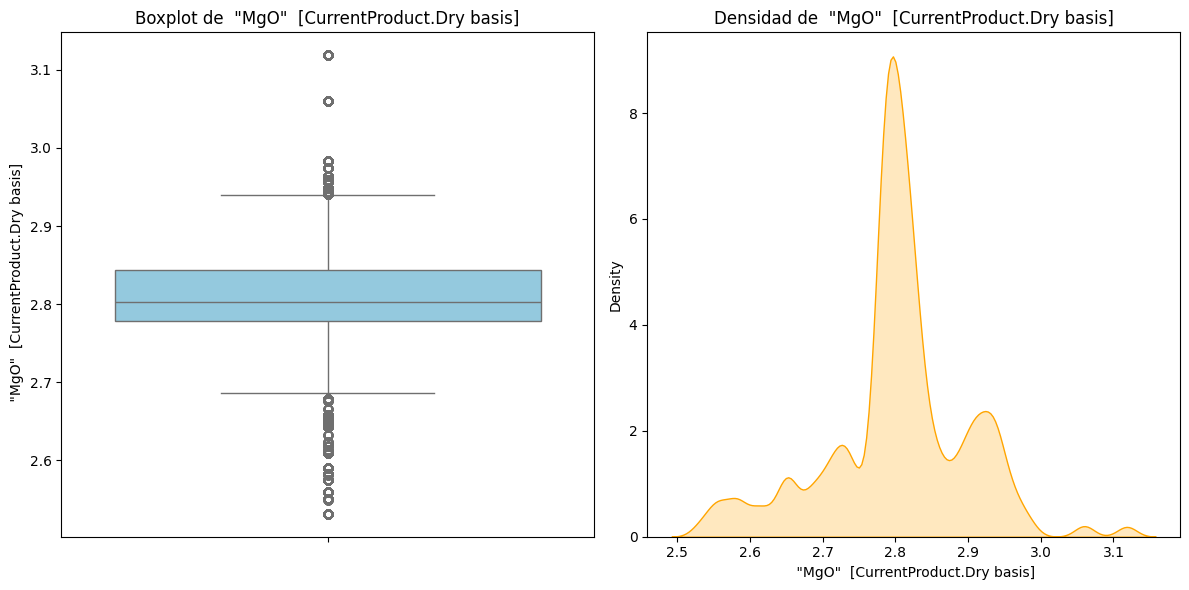

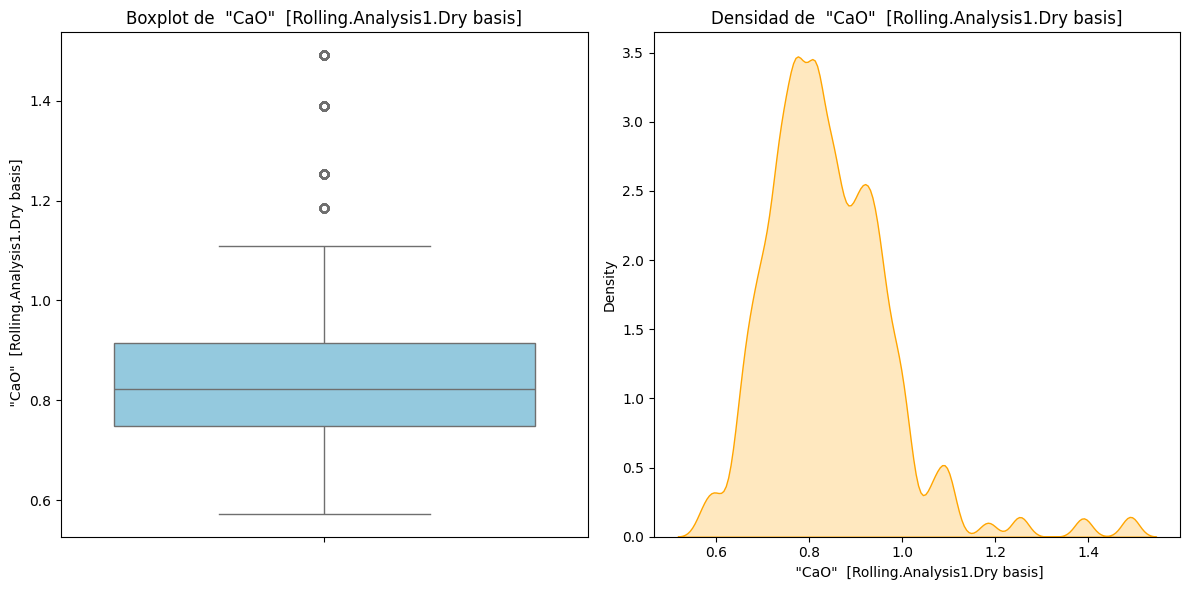

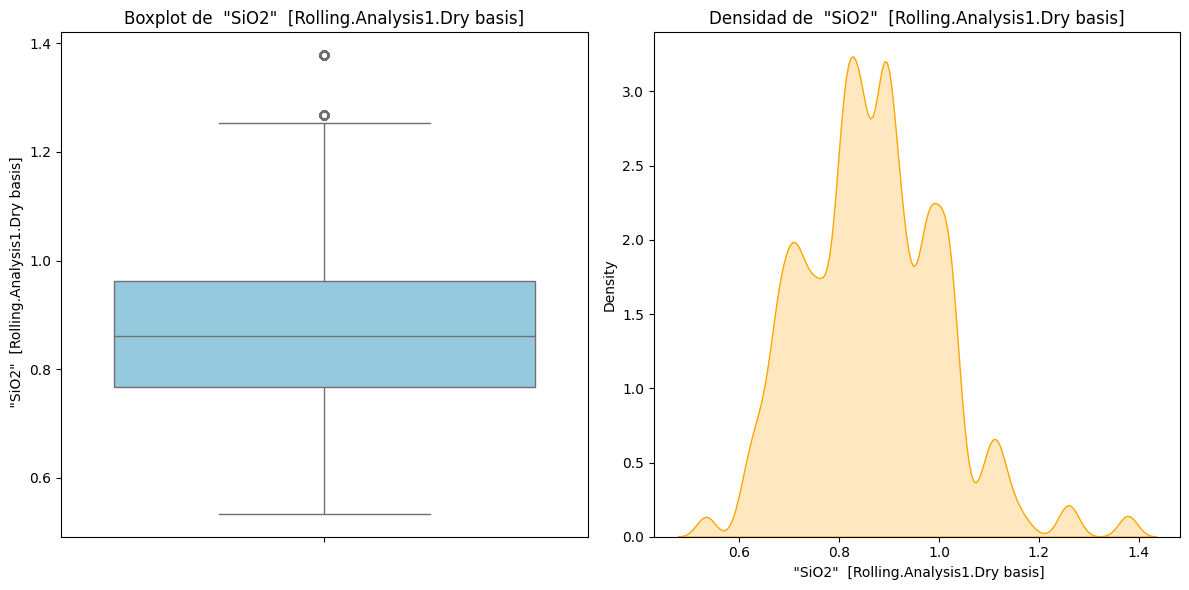

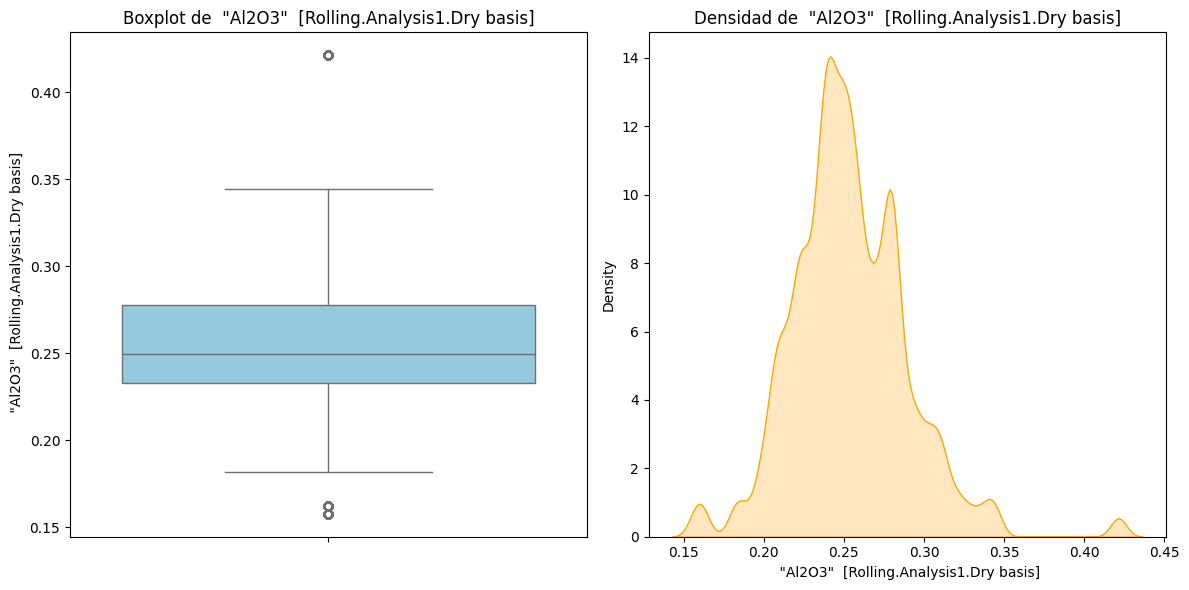

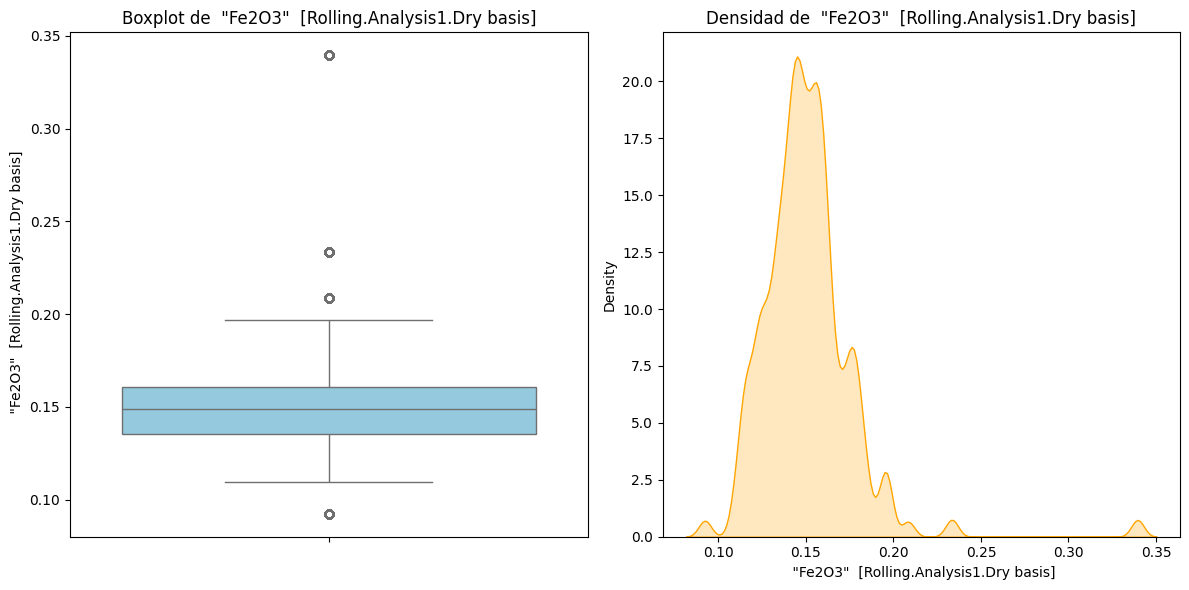

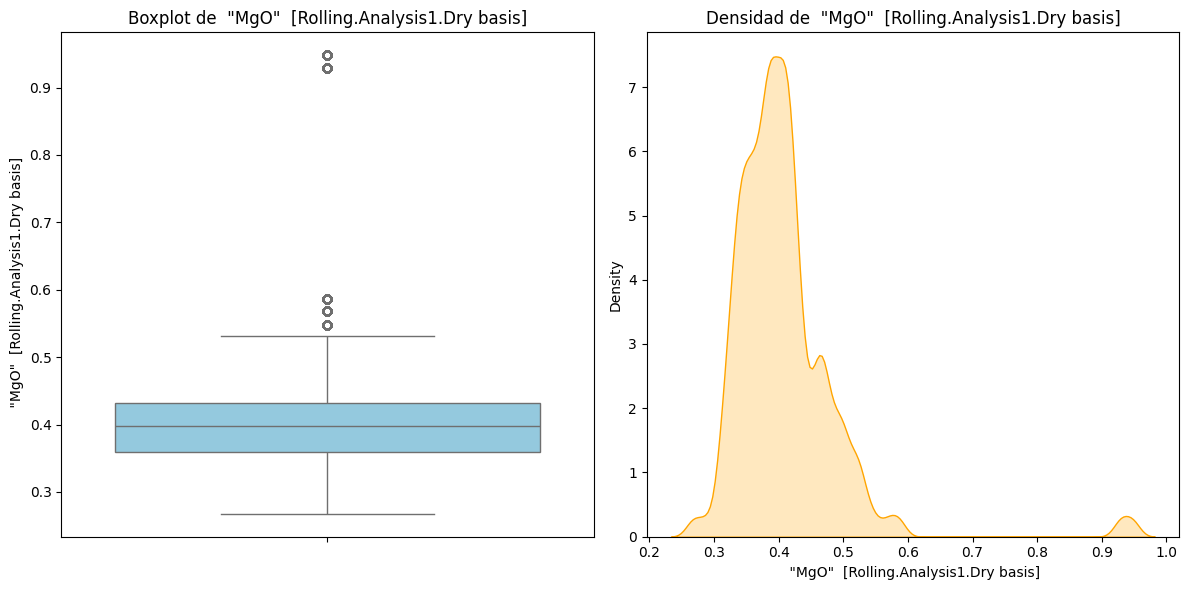

In [169]:
# Definir las columnas numéricas
numeric_columns = dataset.select_dtypes(include='float64').columns

# Generar gráficos separados para cada variable
for column in numeric_columns:
    # Crear figura y ejes
    fig, (ax_box, ax_kde) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    # Gráfico de cajas (boxplot)
    sns.boxplot(data=dataset[column], ax=ax_box, color='skyblue')
    ax_box.set_title(f'Boxplot de {column}')
    
    # Gráfico de densidad (kdeplot)
    sns.kdeplot(data=dataset[column], ax=ax_kde, color='orange', fill=True)
    ax_kde.set_title(f'Densidad de {column}')
    
    # Mostrar la figura
    plt.tight_layout()
    plt.show()

In [170]:
# Calcular los cuartiles y el rango intercuartílico (IQR)

Q1 = dataset[numeric_columns].quantile(0.25)
Q3 = dataset[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remover los outliers
for col in numeric_columns:
    dataset = dataset[(dataset[col] >= lower_bound[col]) & (dataset[col] <= upper_bound[col])]

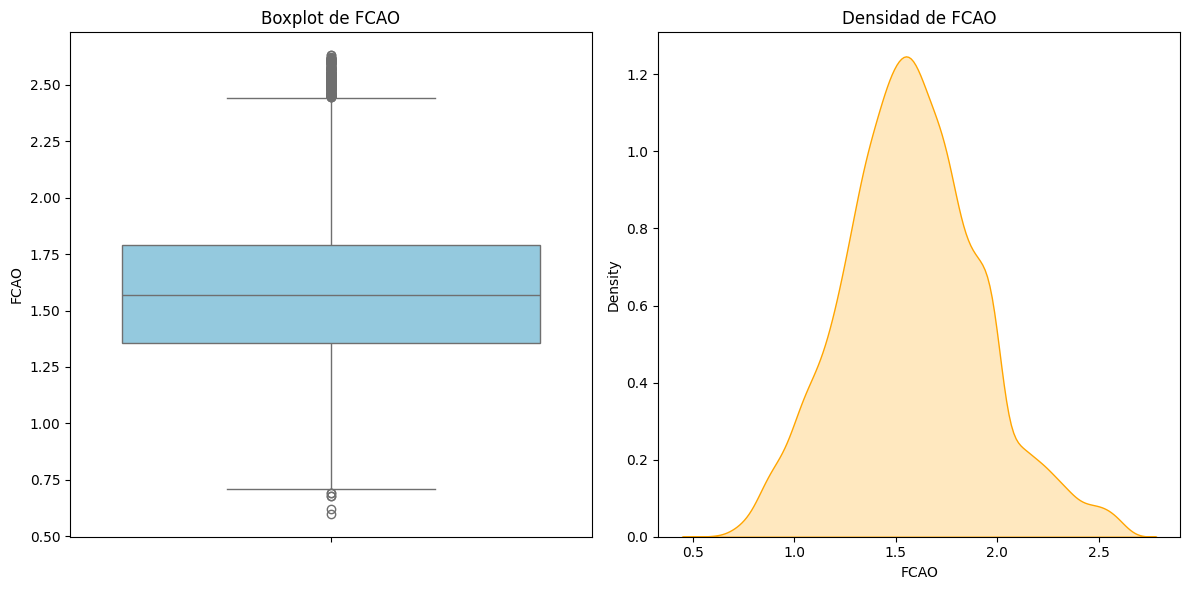

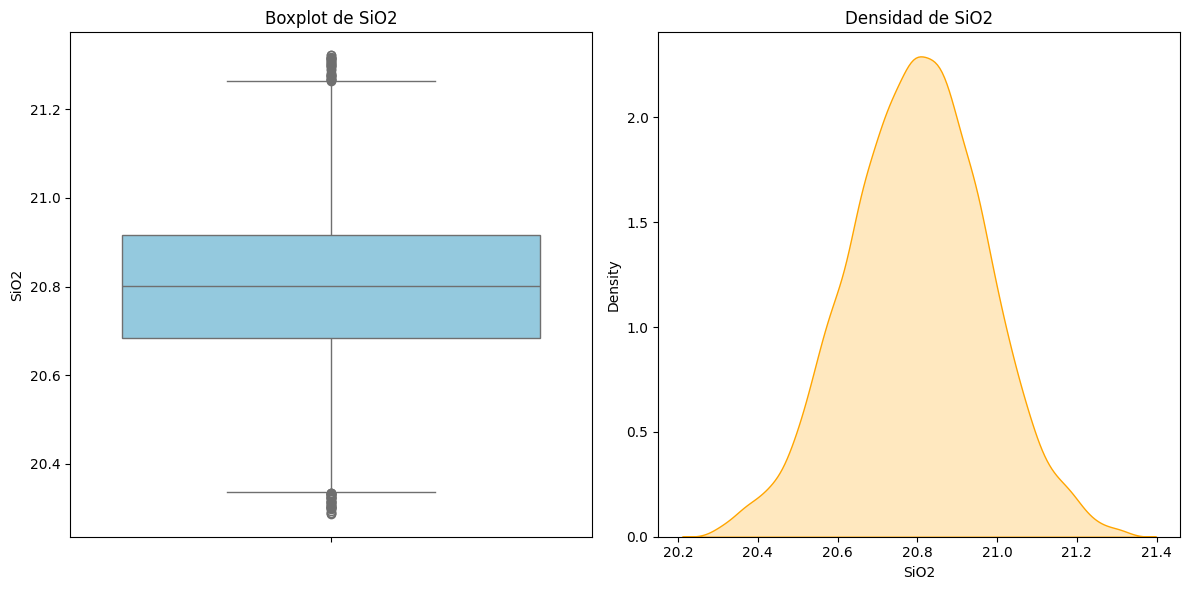

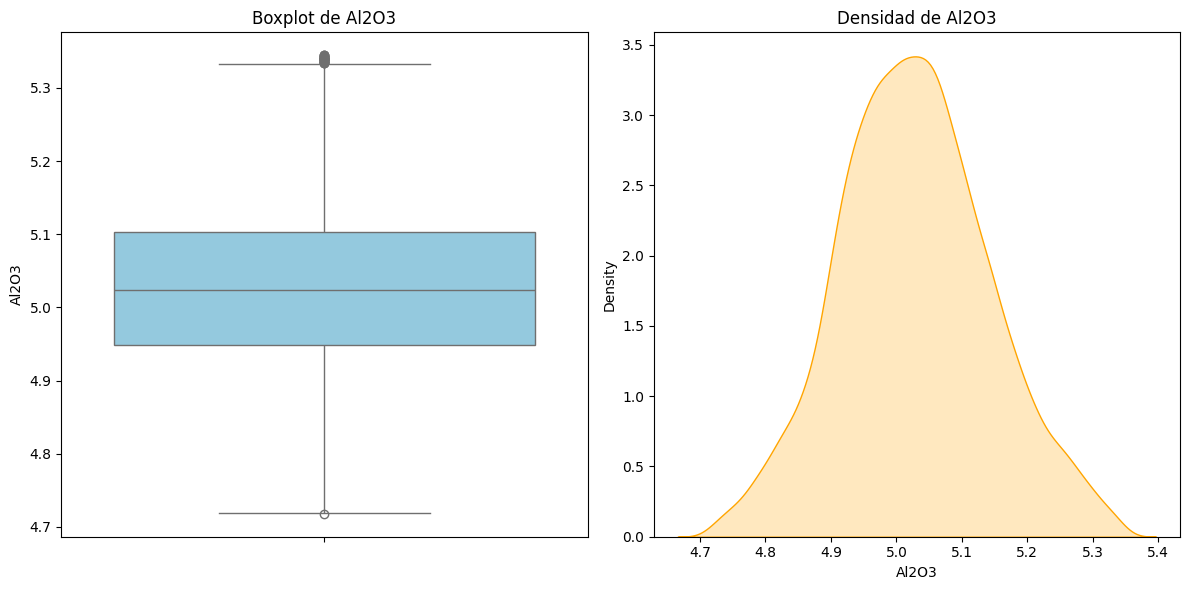

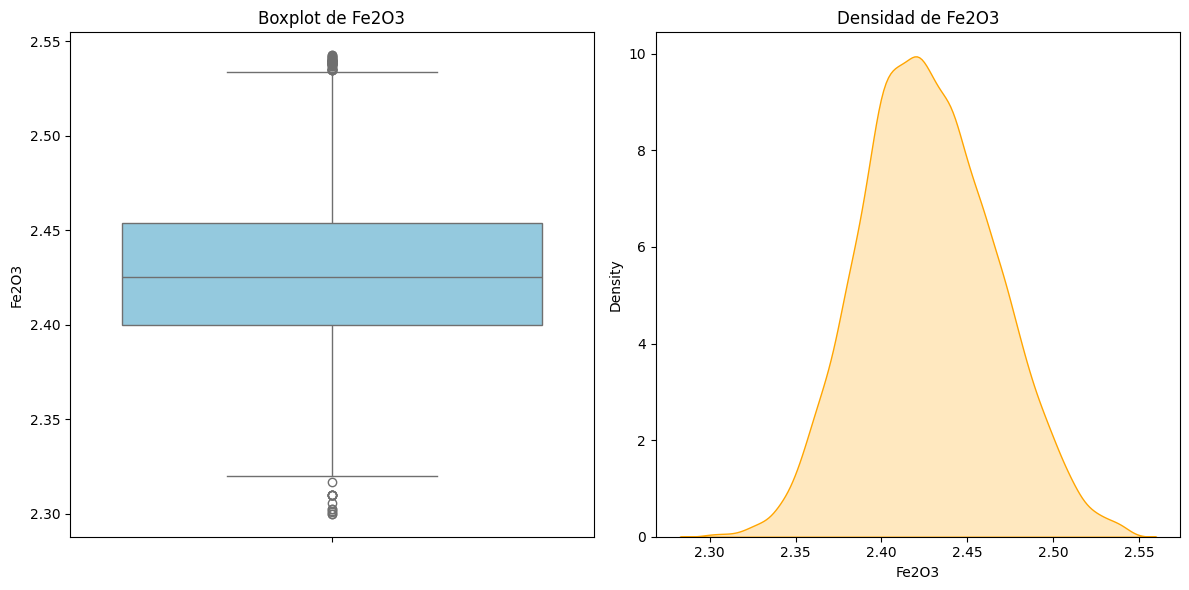

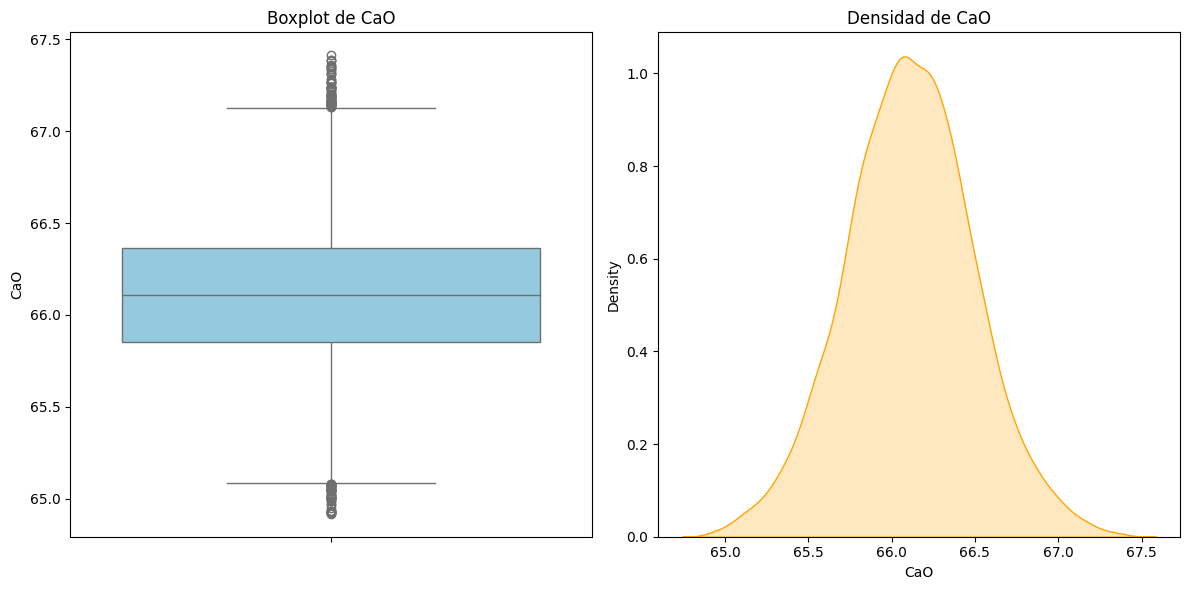

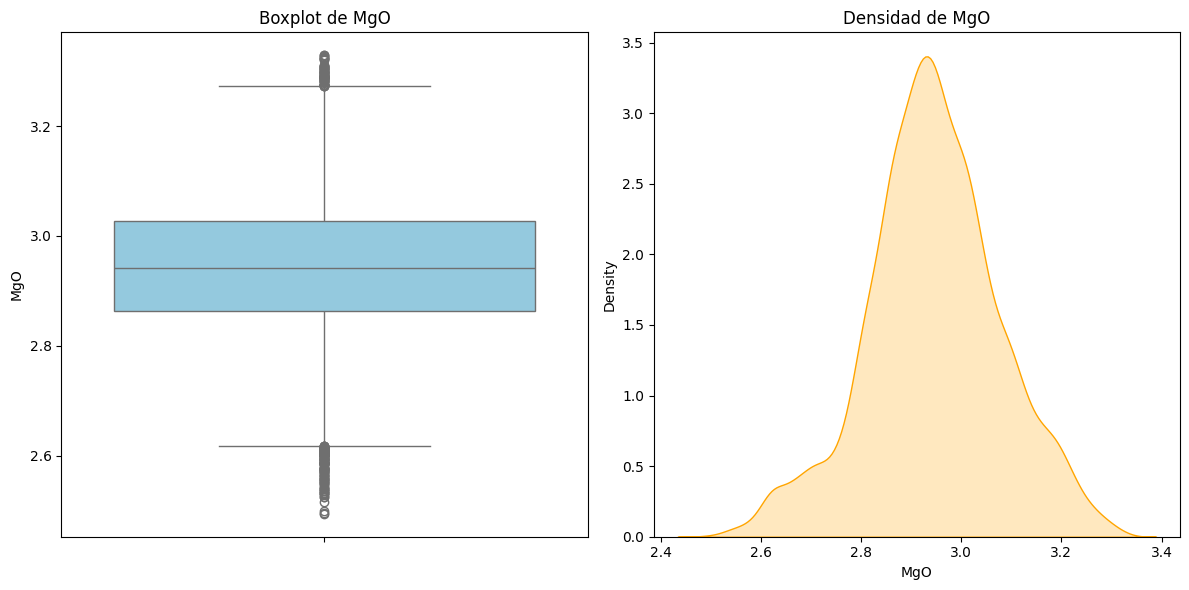

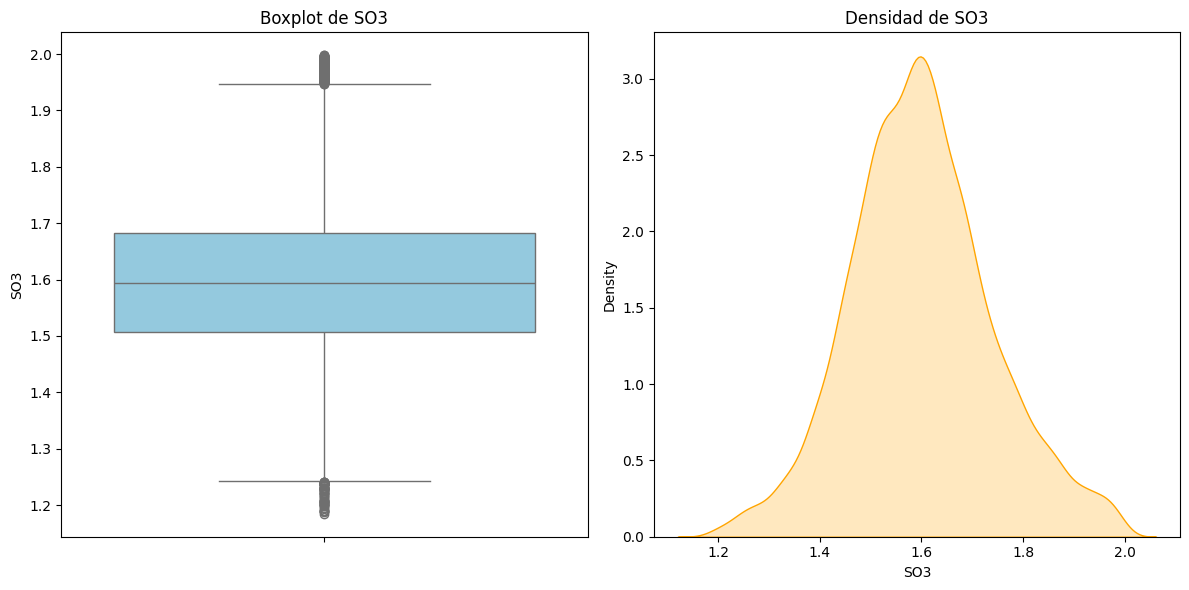

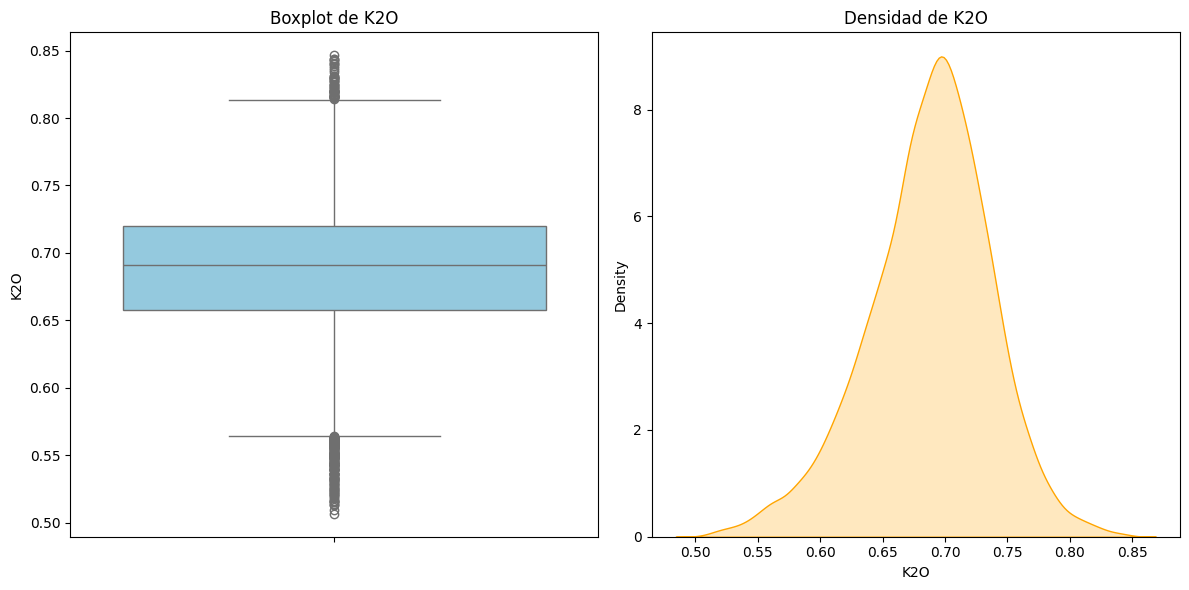

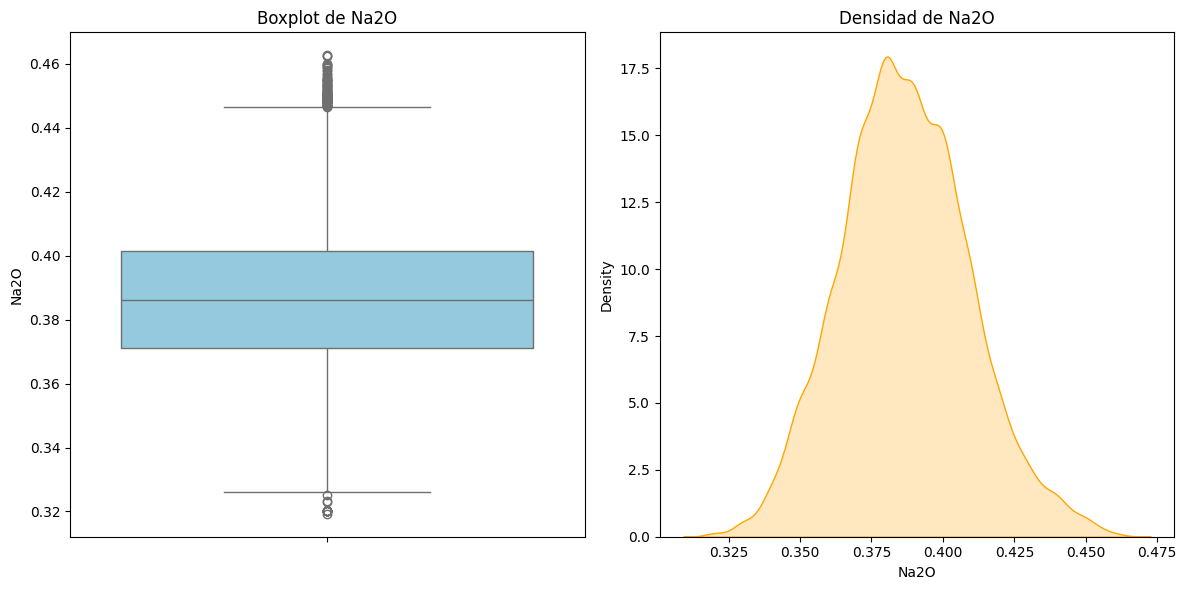

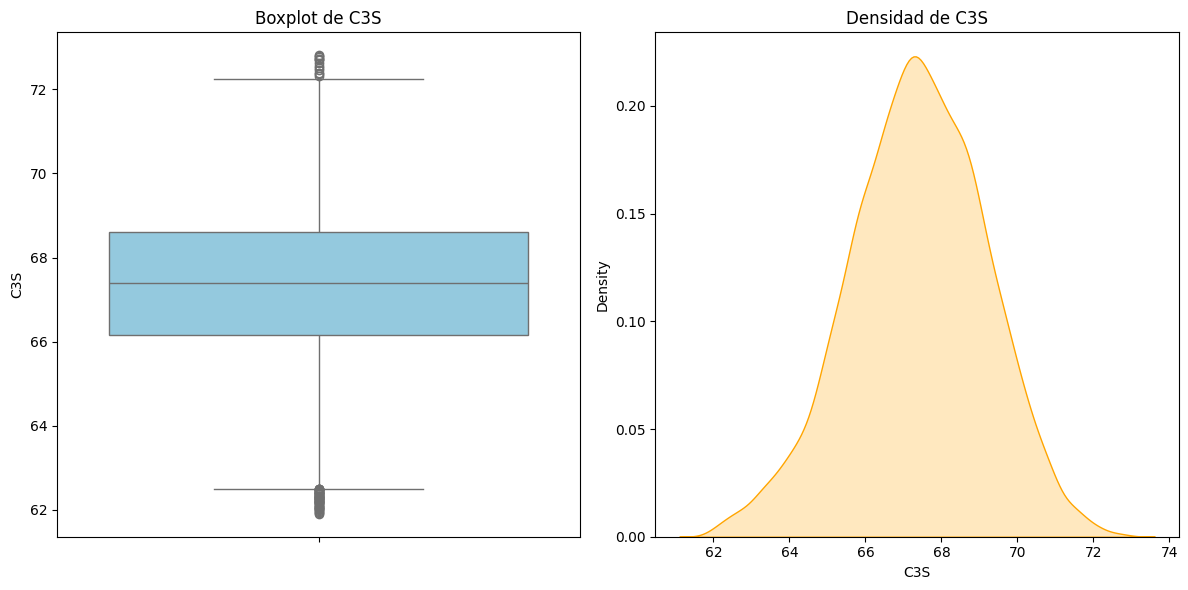

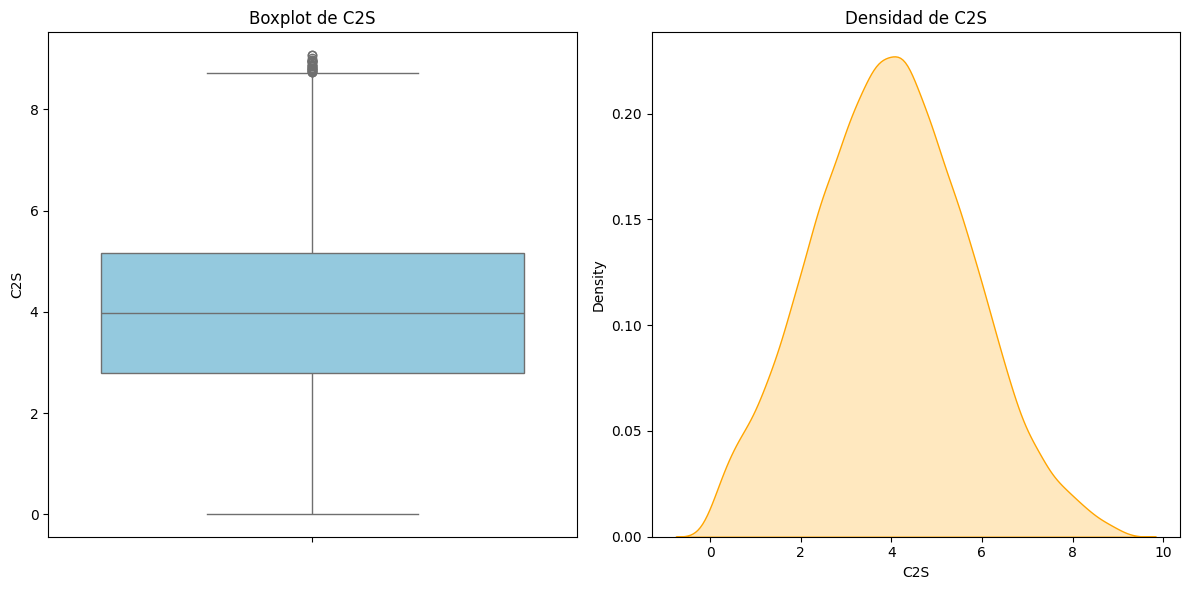

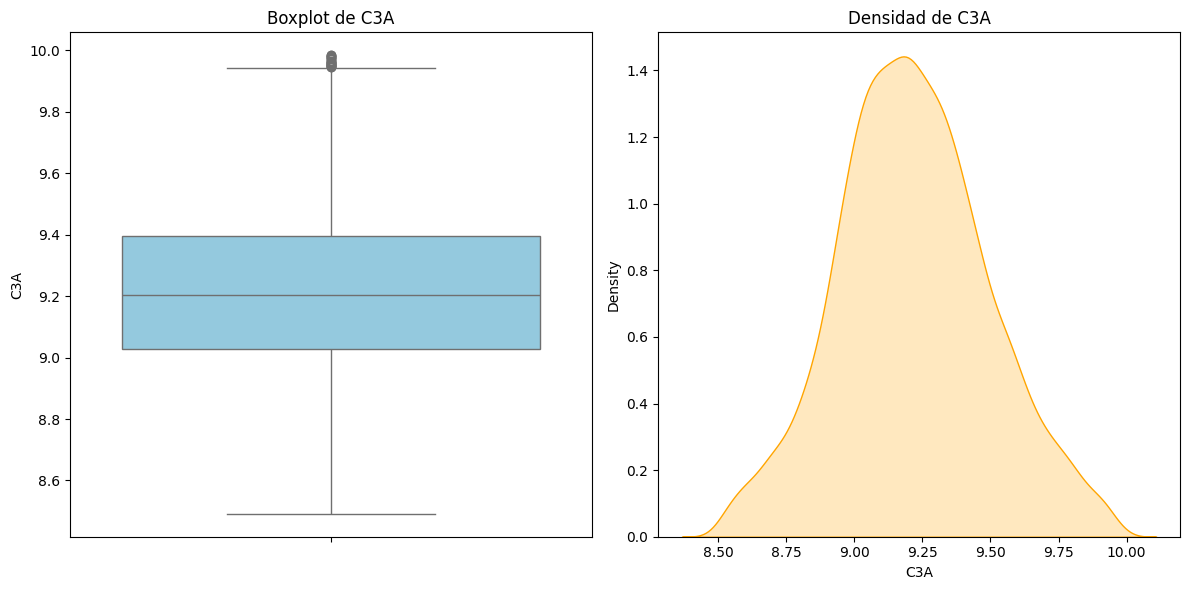

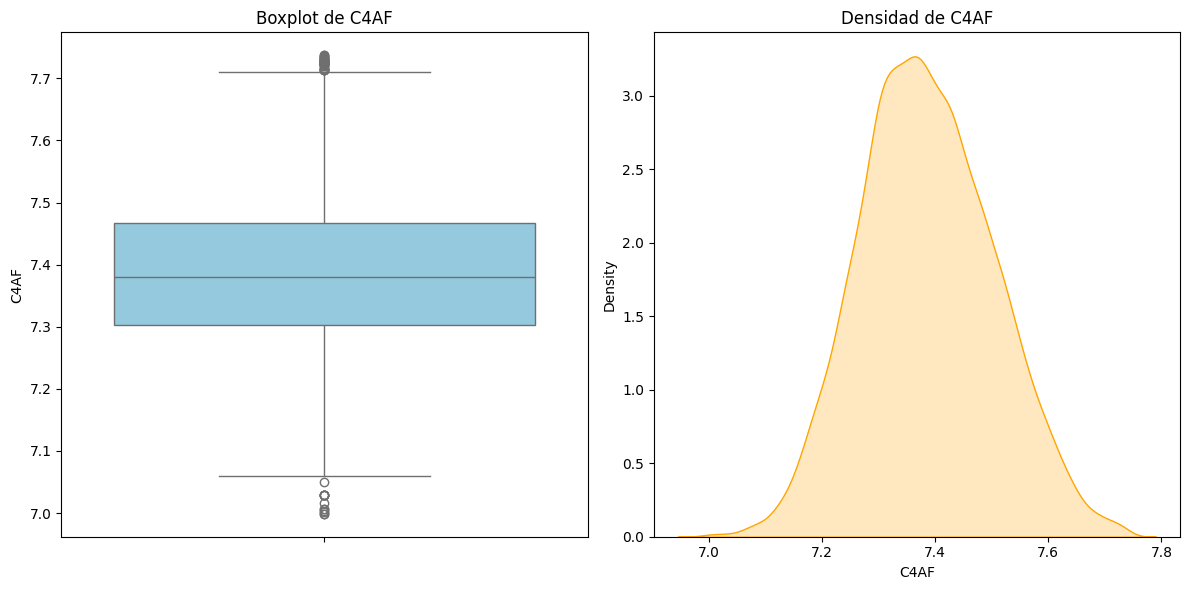

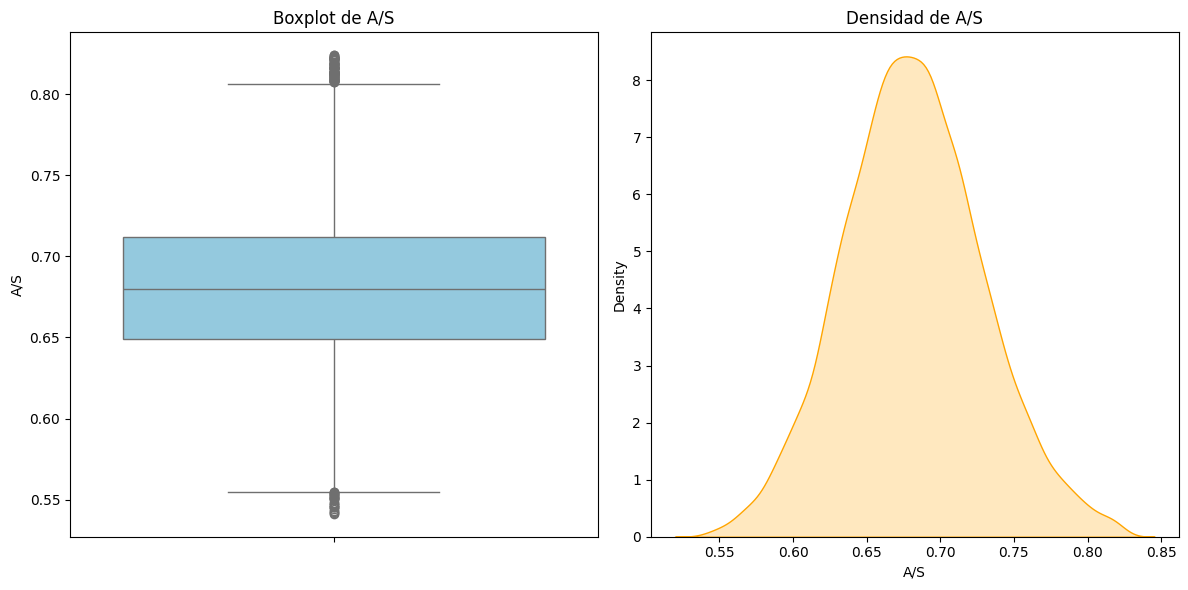

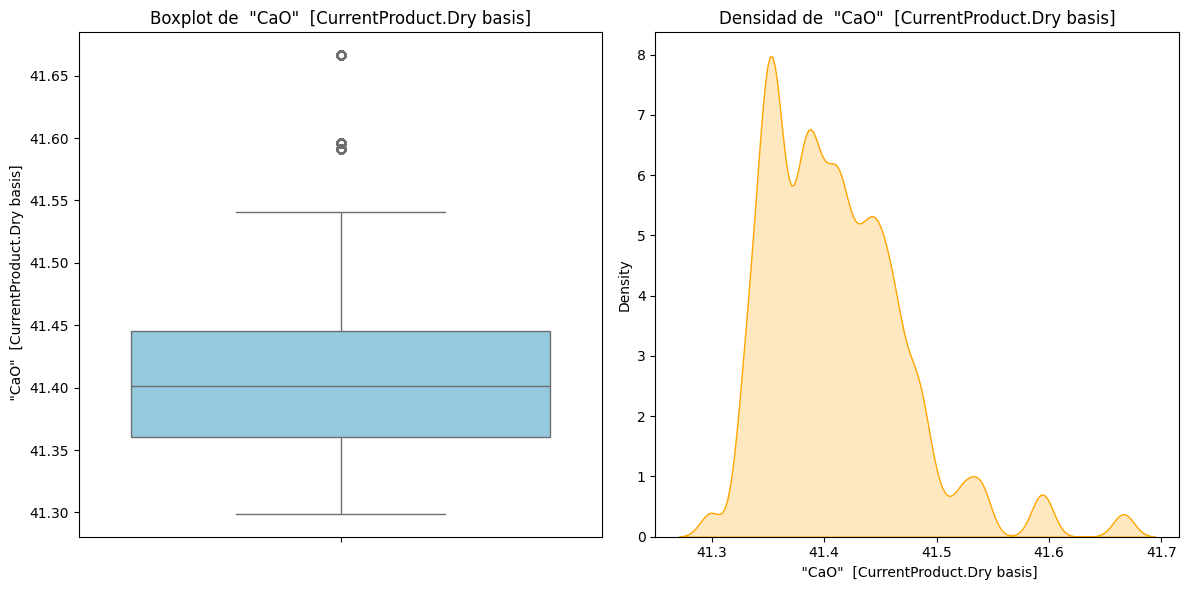

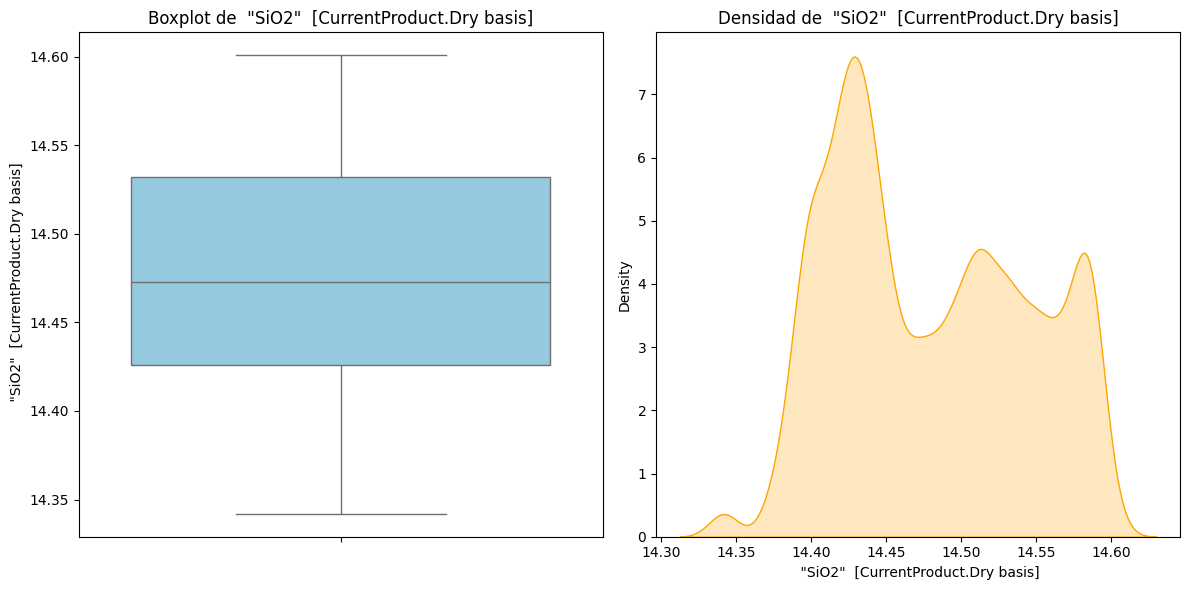

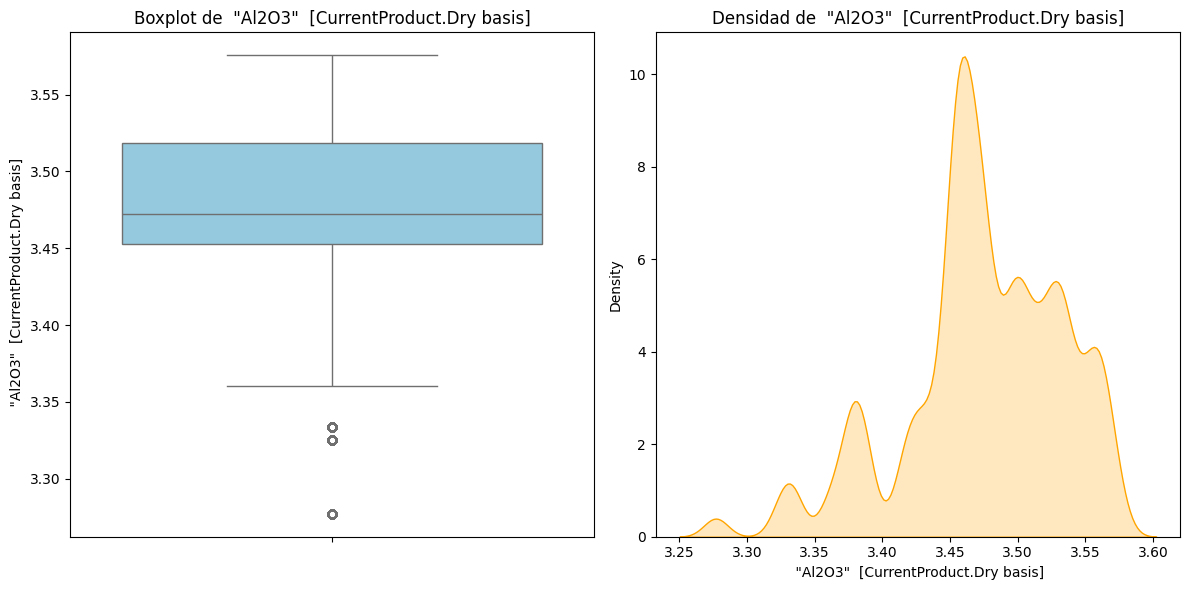

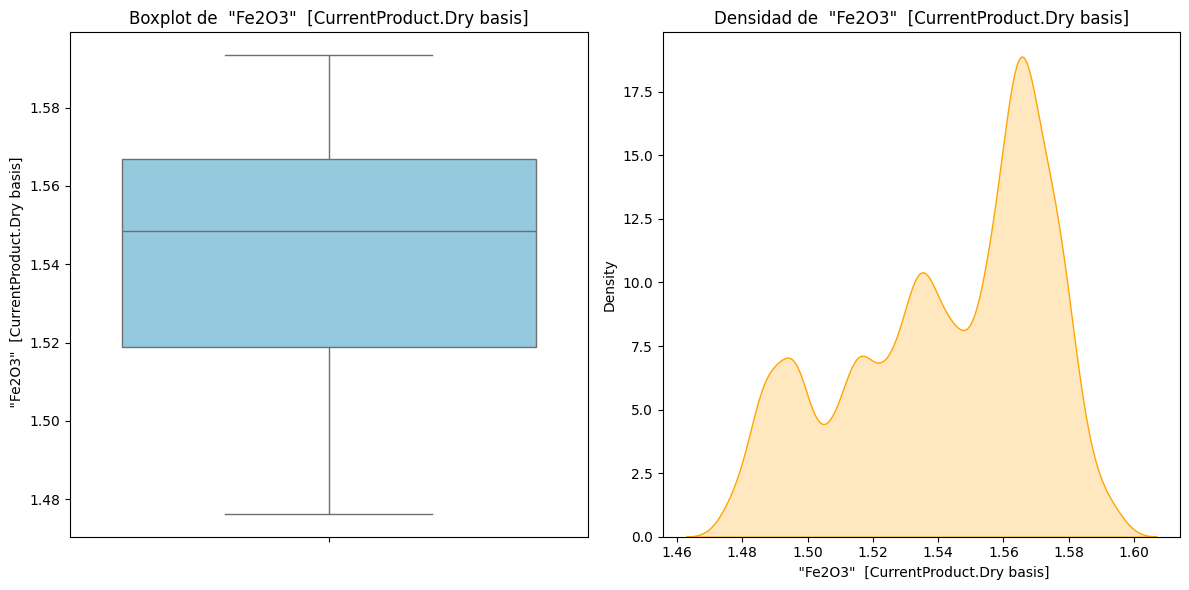

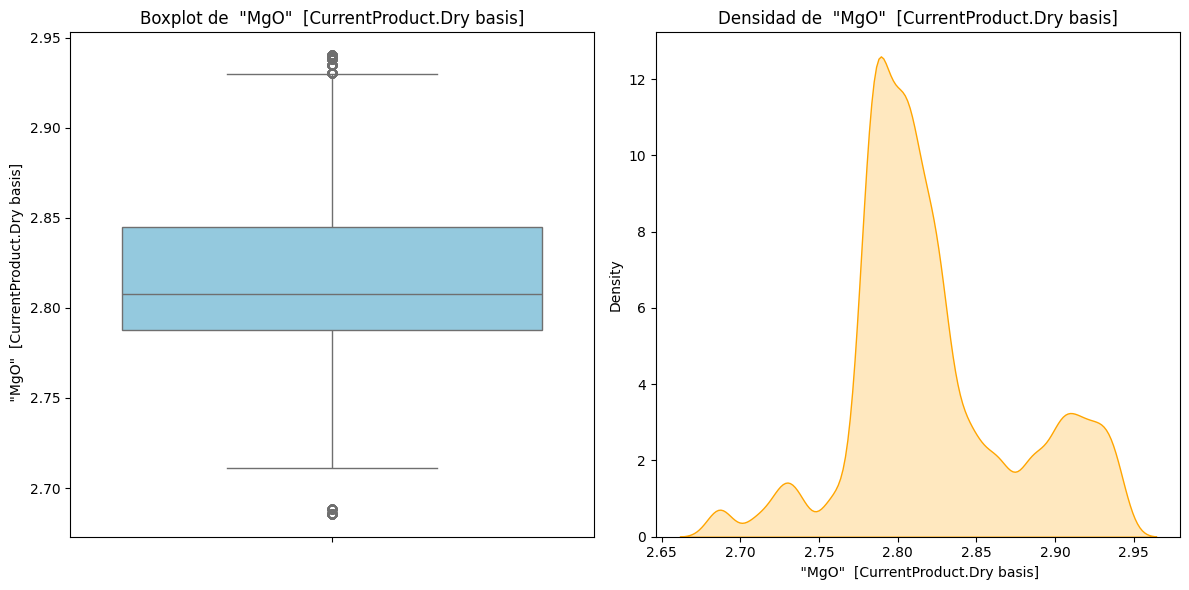

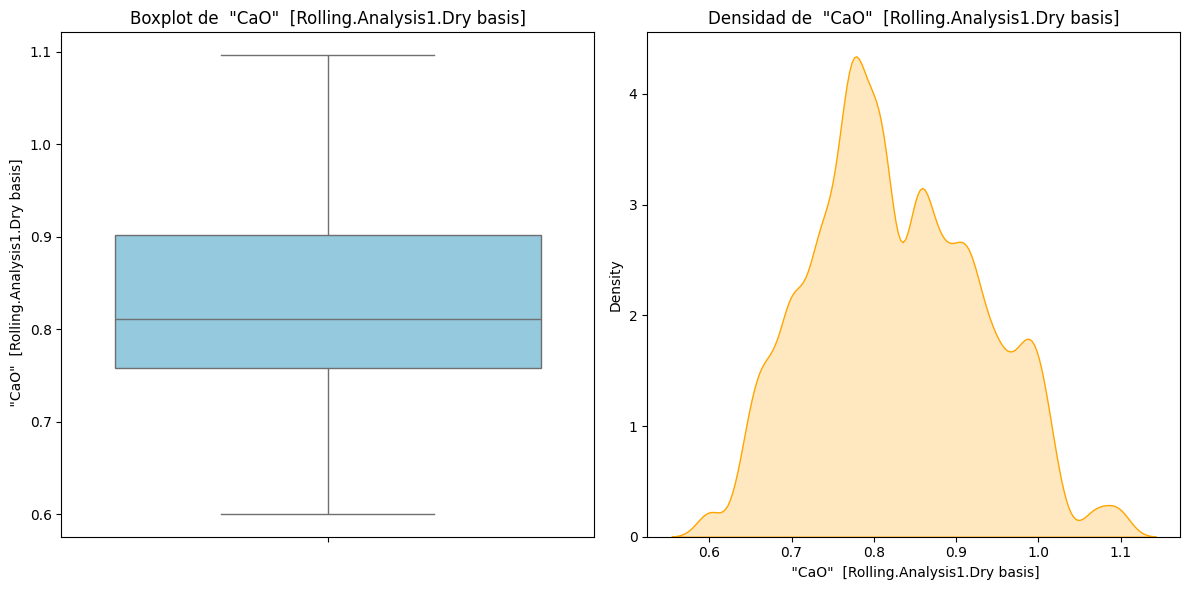

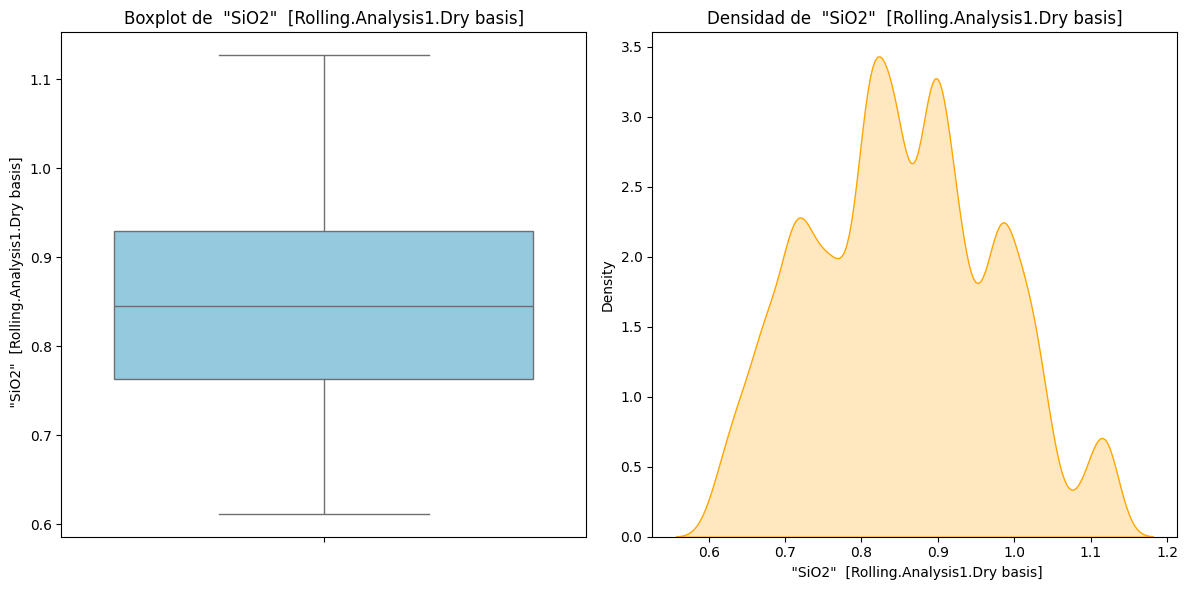

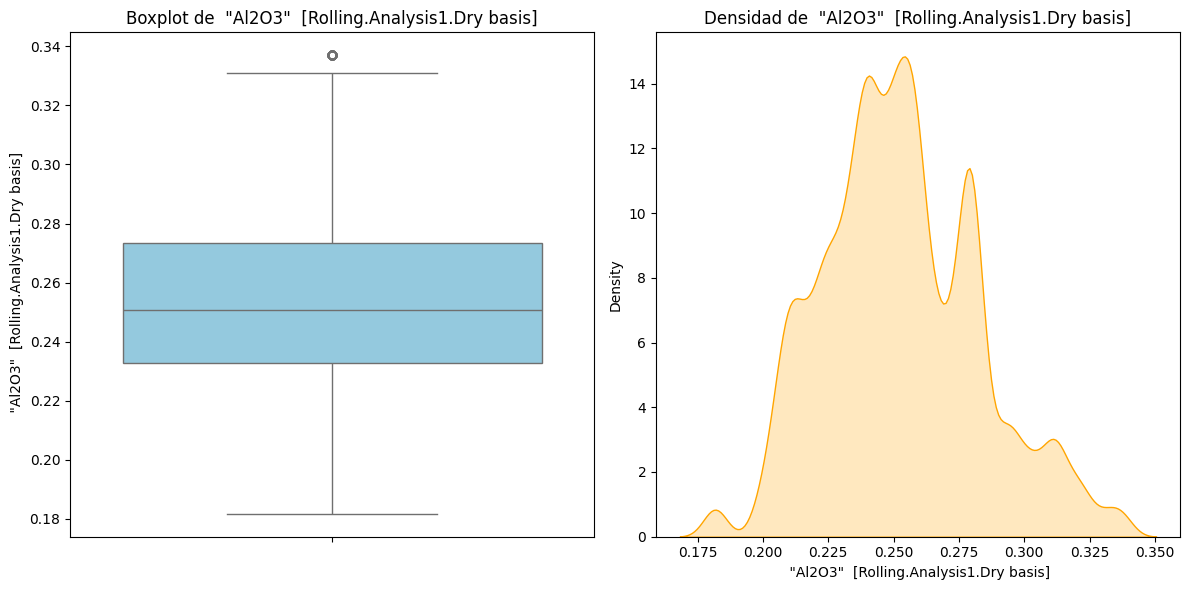

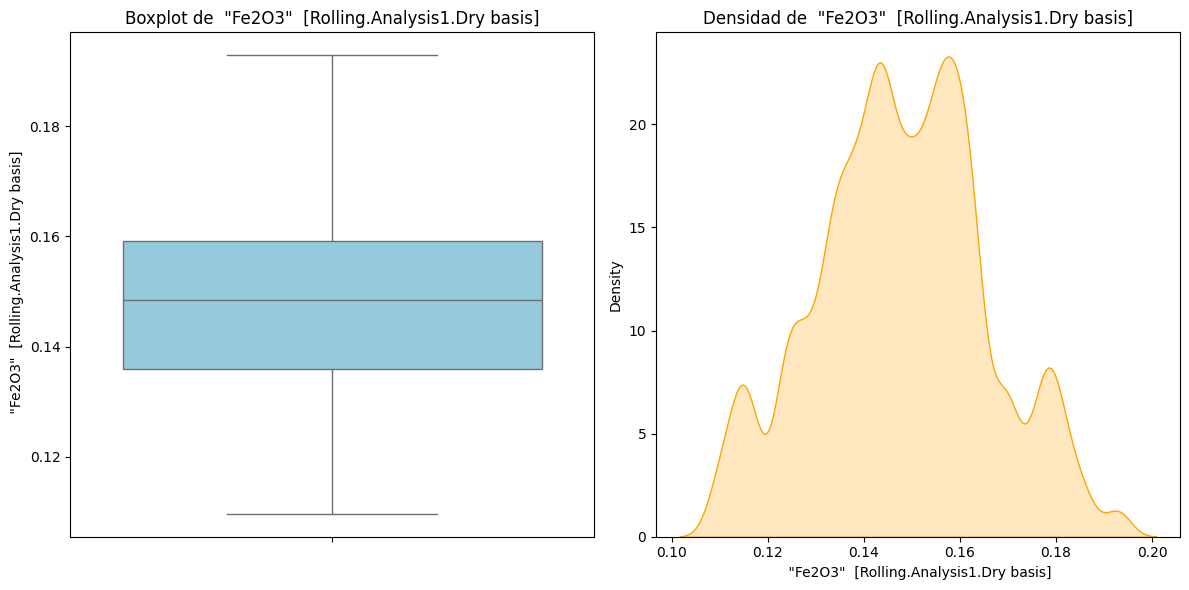

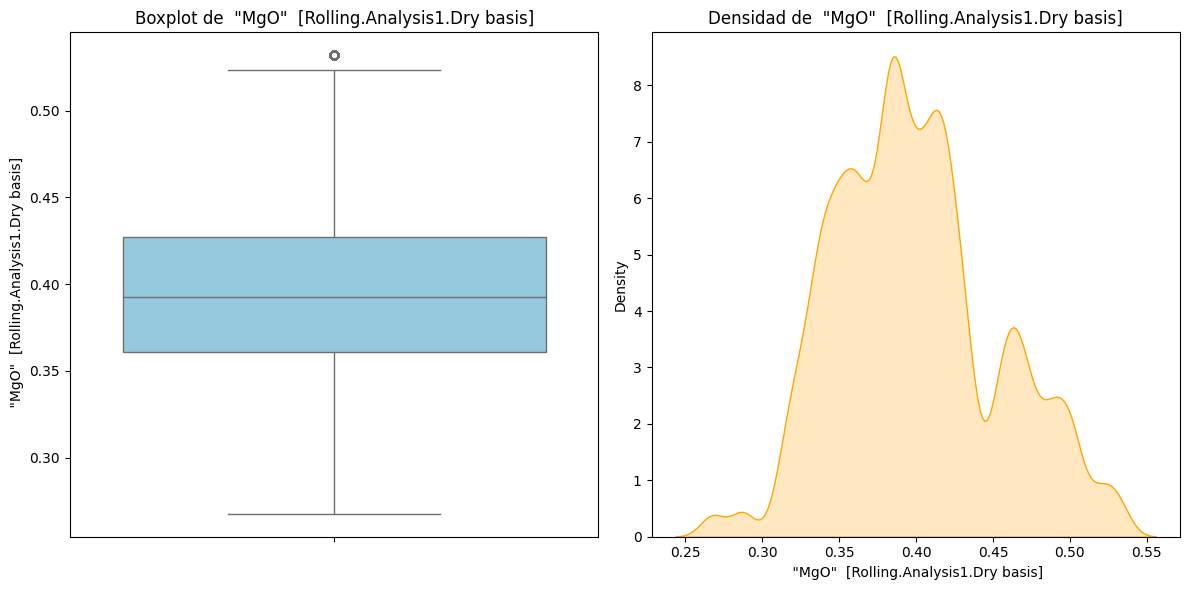

In [171]:
# Generar gráficos separados para cada variable
for column in numeric_columns:
    # Crear figura y ejes
    fig, (ax_box, ax_kde) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    # Gráfico de cajas (boxplot)
    sns.boxplot(data=dataset[column], ax=ax_box, color='skyblue')
    ax_box.set_title(f'Boxplot de {column}')
    
    # Gráfico de densidad (kdeplot)
    sns.kdeplot(data=dataset[column], ax=ax_kde, color='orange', fill=True)
    ax_kde.set_title(f'Densidad de {column}')
    
    # Mostrar la figura
    plt.tight_layout()
    plt.show()

# 3. Codificación de variables categóricas

In [172]:
dataset.columns

Index(['id_eq', 'FCAO', 'SiO2', 'Al2O3', 'Fe2O3', 'CaO', 'MgO', 'SO3', 'K2O',
       'Na2O', 'C3S', 'C2S', 'C3A', 'C4AF', 'A/S',
       ' "CaO"  [CurrentProduct.Dry basis]',
       ' "SiO2"  [CurrentProduct.Dry basis]',
       ' "Al2O3"  [CurrentProduct.Dry basis]',
       ' "Fe2O3"  [CurrentProduct.Dry basis]',
       ' "MgO"  [CurrentProduct.Dry basis]',
       ' "CaO"  [Rolling.Analysis1.Dry basis]',
       ' "SiO2"  [Rolling.Analysis1.Dry basis]',
       ' "Al2O3"  [Rolling.Analysis1.Dry basis]',
       ' "Fe2O3"  [Rolling.Analysis1.Dry basis]',
       ' "MgO"  [Rolling.Analysis1.Dry basis]'],
      dtype='object')

In [173]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar la codificación a la columna 'id_eq'
dataset['id_eq'] = label_encoder.fit_transform(dataset['id_eq'])

# Ver los resultados
dataset.head()

,id_eq,FCAO,SiO2,Al2O3,Fe2O3,CaO,MgO,SO3,K2O,Na2O,...,"""CaO"" [CurrentProduct.Dry basis]","""SiO2"" [CurrentProduct.Dry basis]","""Al2O3"" [CurrentProduct.Dry basis]","""Fe2O3"" [CurrentProduct.Dry basis]","""MgO"" [CurrentProduct.Dry basis]","""CaO"" [Rolling.Analysis1.Dry basis]","""SiO2"" [Rolling.Analysis1.Dry basis]","""Al2O3"" [Rolling.Analysis1.Dry basis]","""Fe2O3"" [Rolling.Analysis1.Dry basis]","""MgO"" [Rolling.Analysis1.Dry basis]"
3465,0,1.86,20.74655,4.870823,2.360694,66.69006,2.790123,1.595210,0.608522,0.390245,...,41.66631,14.34193,3.27718,1.50156,2.73787,0.782826,0.767196,0.25091,0.157219,0.412134
3467,2,2.14,20.92970,4.941150,2.353990,66.32890,2.881785,1.571891,0.666722,0.408149,...,41.66631,14.34193,3.27718,1.50156,2.73787,0.782826,0.767196,0.25091,0.157219,0.412134
3469,2,1.72,21.03746,4.845152,2.323165,66.50318,2.839897,1.325274,0.594941,0.380408,...,41.66631,14.34193,3.27718,1.50156,2.73787,0.782826,0.767196,0.25091,0.157219,0.412134
3470,0,1.67,20.66737,4.848819,2.361129,66.49850,2.797447,1.553735,0.595764,0.389239,...,41.66631,14.34193,3.27718,1.50156,2.73787,0.782826,0.767196,0.25091,0.157219,0.412134
3471,0,1.75,20.70658,4.790758,2.342509,66.68516,2.784528,1.569870,0.597550,0.385464,...,41.66631,14.34193,3.27718,1.50156,2.73787,0.782826,0.767196,0.25091,0.157219,0.412134


In [175]:
dataset.to_csv('../data/processed/features_for_model.csv')